In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import TomekLinks
import lightgbm

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
df=pd.read_csv("rf_data.csv")

# Data Analysis

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Features like Glucose,BP,Skin Thickness,Insulin,BMI have zero value which is rare case. Lets look in to it
feature=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for i in feature:
    zero=len(df[df[i]==0])
    non_zero=len(df[df[i]!=0])
    print("For feature ",i," #of zero ",zero,"# of non_zero ",non_zero)

For feature  Pregnancies  #of zero  111 # of non_zero  657
For feature  Glucose  #of zero  5 # of non_zero  763
For feature  BloodPressure  #of zero  35 # of non_zero  733
For feature  SkinThickness  #of zero  227 # of non_zero  541
For feature  Insulin  #of zero  374 # of non_zero  394
For feature  BMI  #of zero  11 # of non_zero  757
For feature  DiabetesPedigreeFunction  #of zero  0 # of non_zero  768
For feature  Age  #of zero  0 # of non_zero  768
For feature  Outcome  #of zero  500 # of non_zero  268


# Glucose is zero for 5, not touching it
# BP can not be  zero , replacing it with mean
# Skin Thickness cannot be zero for nearly 33% pop, replacing it too
# Same fpr insulin
#  Same for BMI

# Replacing zero for selected features

In [7]:
feature_list=['BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in feature_list:
    median=np.median(df[df[i]!=0][i])
    df.loc[df[i]==0,i]=median

# Checking again for the columns

In [8]:
feature=['BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in feature:
    zero=len(df[df[i]==0])
    non_zero=len(df[df[i]!=0])
    print("For feature ",i," #of zero ",zero,"# of non_zero ",non_zero)

For feature  BloodPressure  #of zero  0 # of non_zero  768
For feature  SkinThickness  #of zero  0 # of non_zero  768
For feature  Insulin  #of zero  0 # of non_zero  768
For feature  BMI  #of zero  0 # of non_zero  768


# Great

# Plotting pair Plot

C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


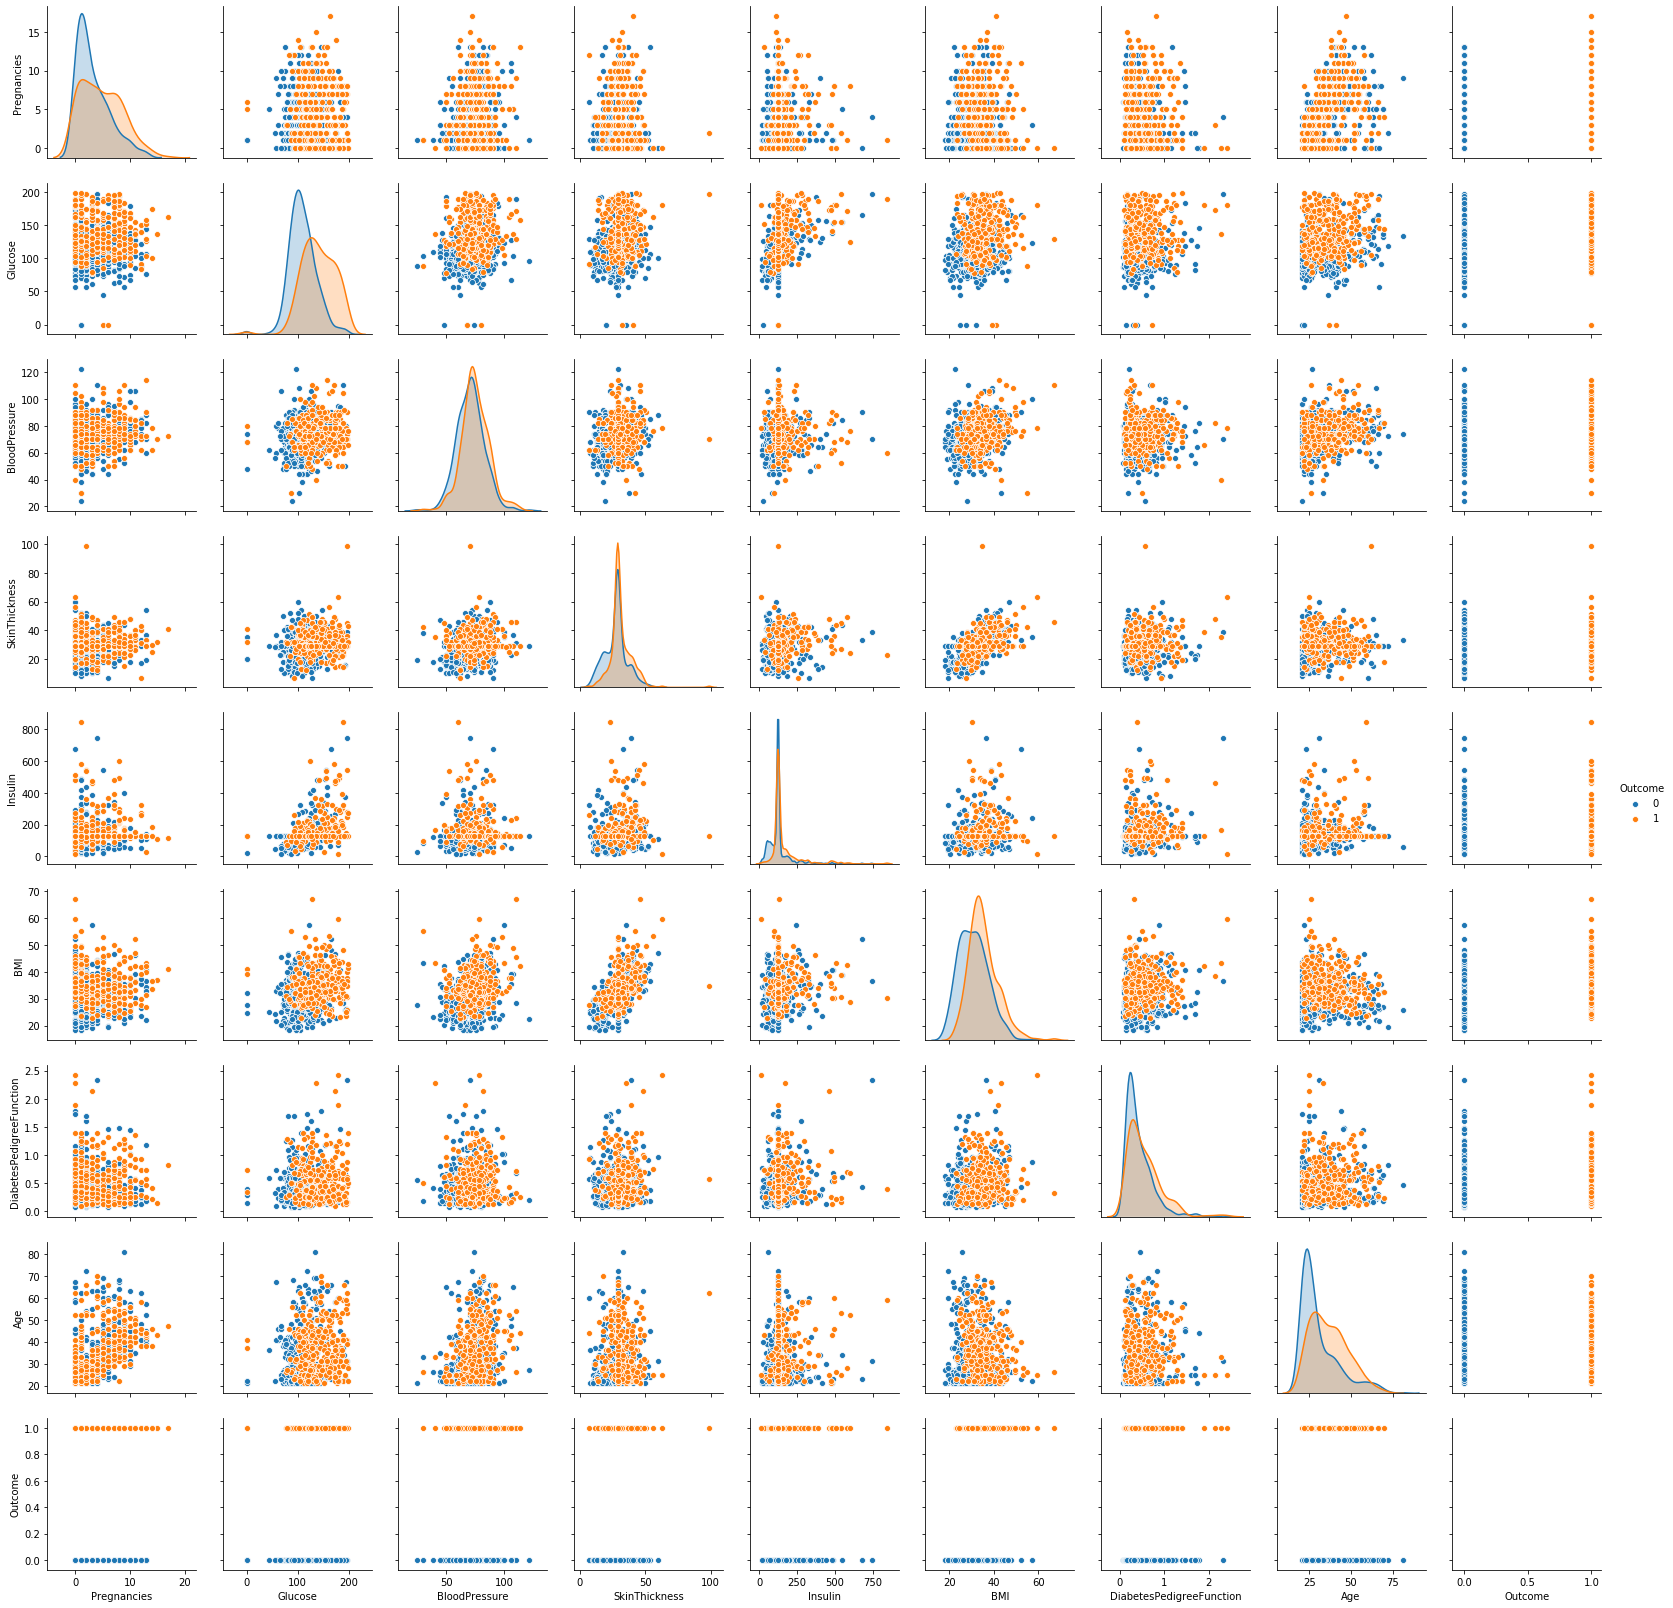

In [9]:
feature=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.pairplot(df,hue="Outcome")

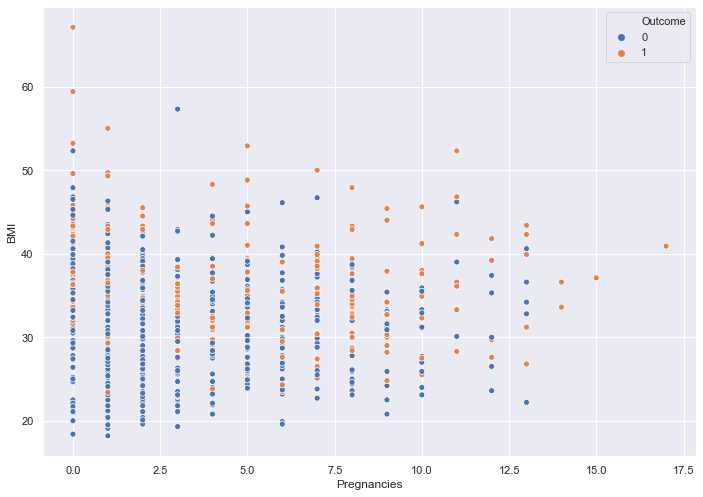

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("Pregnancies","BMI",hue="Outcome",data=df)

In [11]:
#BMI <=32 and preg<=5, Feature name "F1"
df["F1"]=0
df.loc[(df["BMI"]<=32) & (df["Pregnancies"]<=5),"F1"]=1

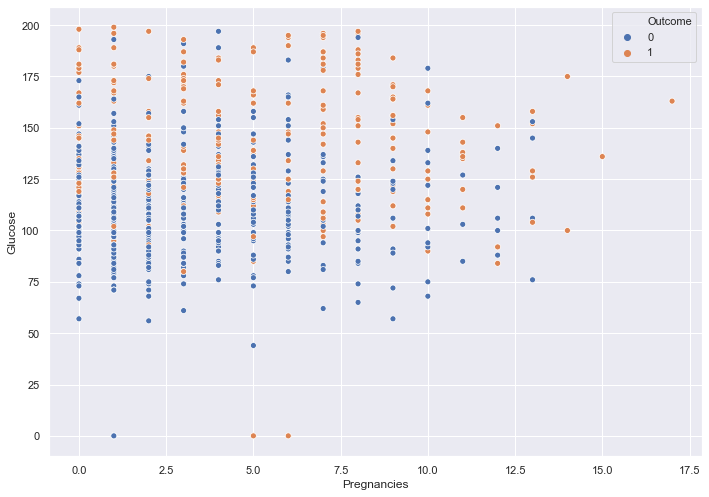

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("Pregnancies","Glucose",hue="Outcome",data=df)

In [13]:
#Glucose <=125 and Pregnanices<=6, Feature name="F2"
df["F2"]=0
df.loc[(df["Glucose"]<=125) & (df["Pregnancies"]<=6),"F2"]=1

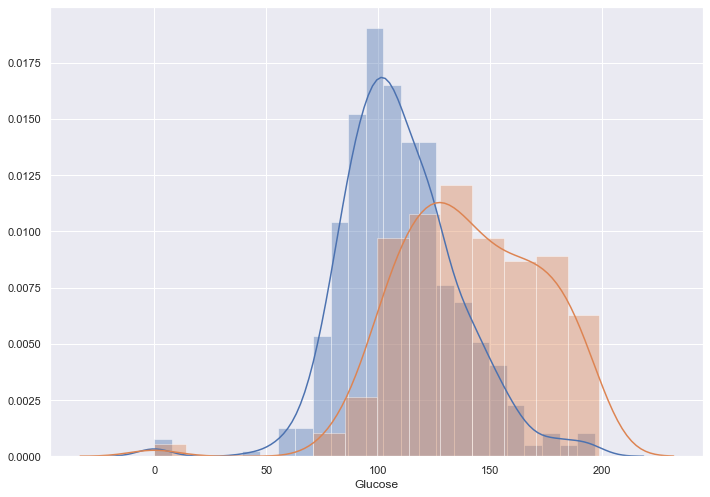

In [14]:
sns.distplot(df[df["Outcome"]==0]["Glucose"])
sns.distplot(df[df["Outcome"]==1]["Glucose"])

In [15]:
# Glucose >=175,Feature= 'F3'
df["F3"]=0
df.loc[df['Glucose']>=175,"F3"]=1

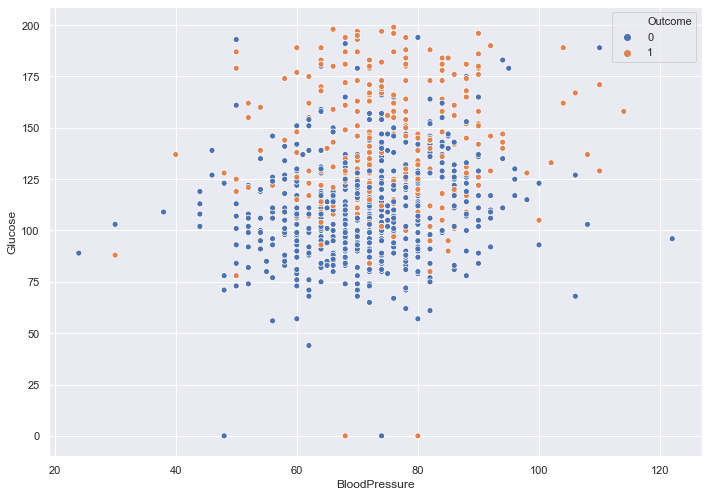

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("BloodPressure","Glucose",hue="Outcome",data=df)

In [17]:
# Glucose <120 and BP<=62 plus Glucose <80 and BP>=62, feature ="F4"
df["F4"]=0
df.loc[(df['Glucose']<120) & (df["BloodPressure"]<=62),"F4"]=1
df.loc[(df['Glucose']<80) & (df["BloodPressure"]>62),"F4"]=1

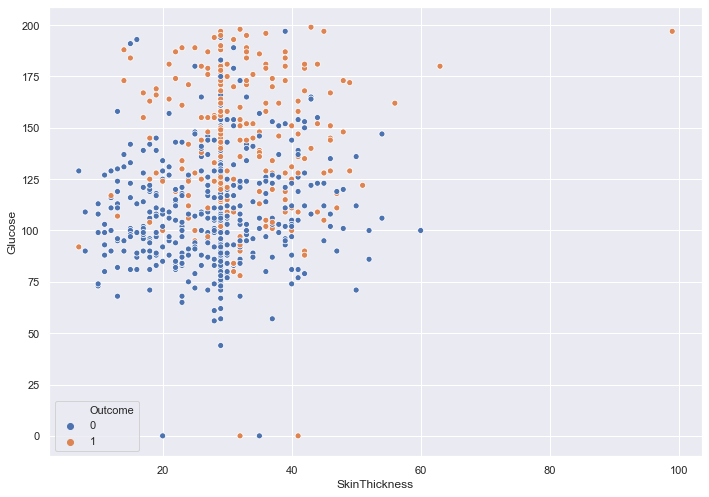

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("SkinThickness","Glucose",hue="Outcome",data=df)

In [19]:
# Glucose<=100 and skinthick<=32, feature="F5"
df["F5"]=0
df.loc[(df["Glucose"]<=100) & (df["SkinThickness"]<=32),"F5"]=1

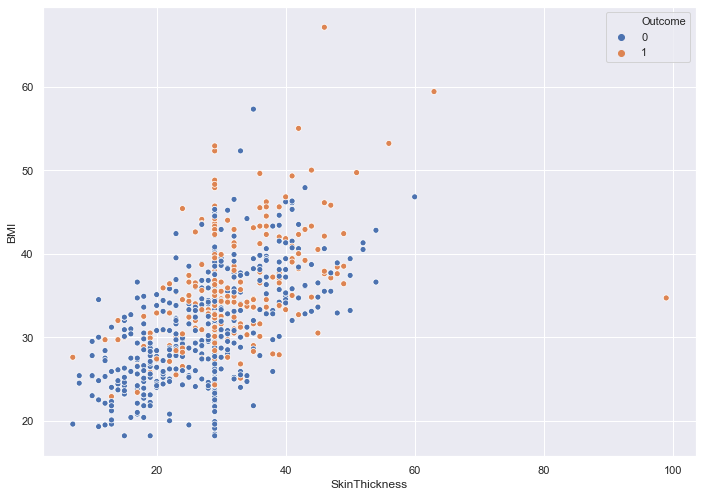

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("SkinThickness","BMI",hue="Outcome",data=df)

In [21]:
# BMI<=28 and skin thickness <=32, Feature="F6"
df["F6"]=0
df.loc[(df["BMI"]<=28) & (df["SkinThickness"]<=32),"F6"]=1

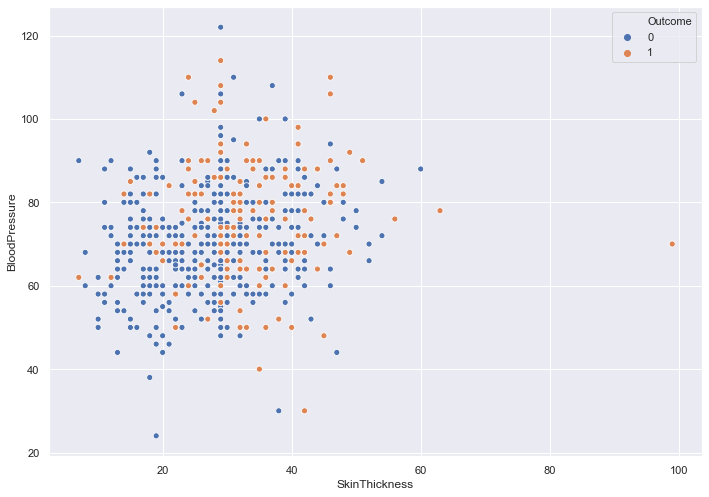

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("SkinThickness","BloodPressure",hue="Outcome",data=df)

In [23]:
# BloodPressure<=60 and SkinThickness<=20, Feature="F7"
df["F7"]=0
df.loc[(df["BloodPressure"]<=60) & (df["SkinThickness"]<=20),"F7"]=1

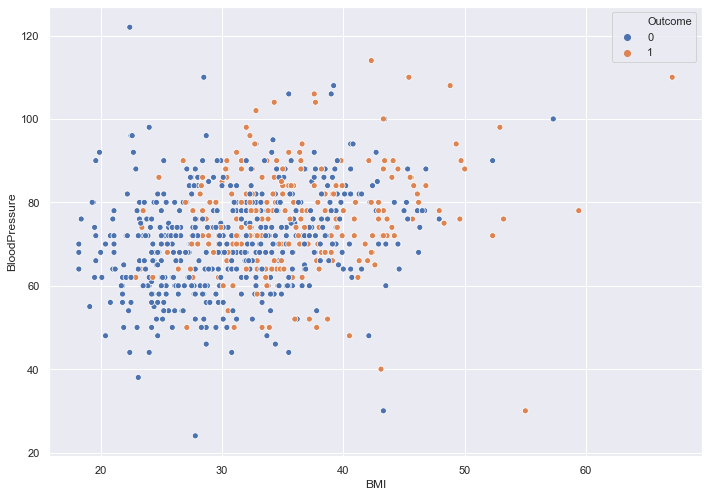

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("BMI","BloodPressure",hue="Outcome",data=df)

In [25]:
df["F8"]=0
df.loc[df["BMI"]<=28,"F8"]=1

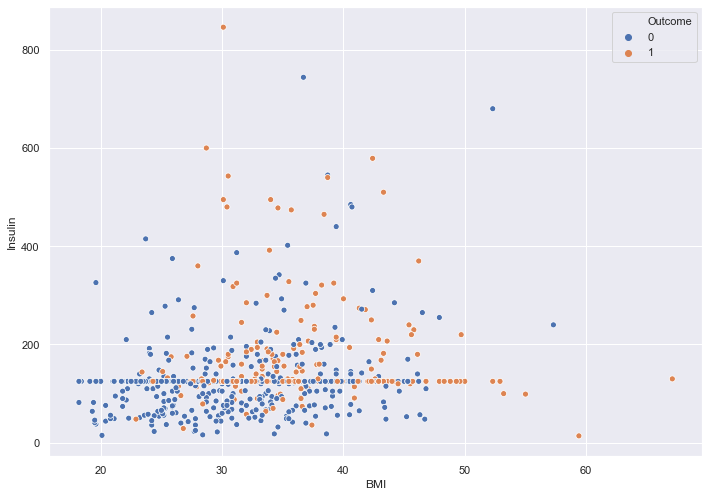

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("BMI","Insulin",hue="Outcome",data=df)

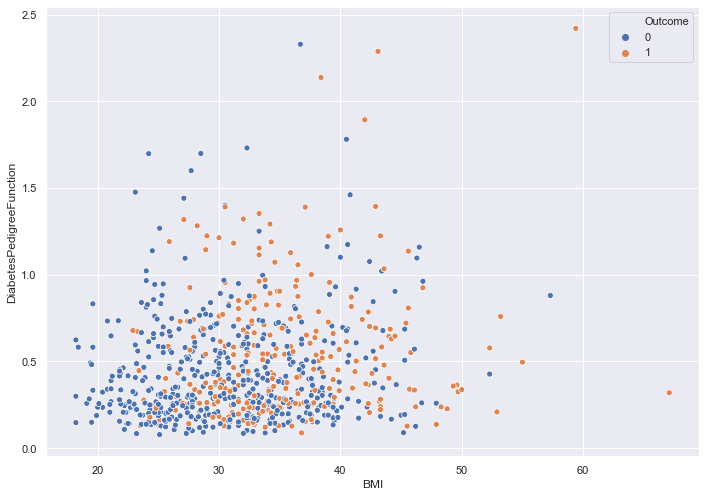

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("BMI","DiabetesPedigreeFunction",hue="Outcome",data=df)

In [28]:
df["F10"]=0
df.loc[df["BMI"]<=25,"F10"]=1

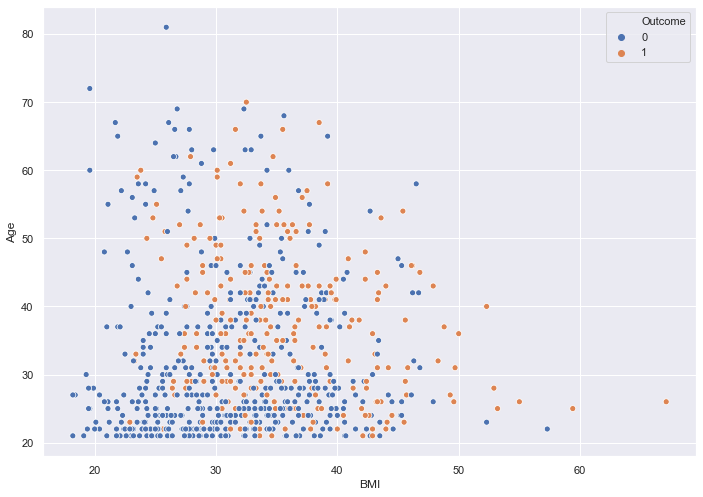

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot("BMI","Age",hue="Outcome",data=df)

In [30]:
#BMI <=23 or AGE<=28 and BMI <=20, feature="F11"
df["F11"]=0
df.loc[(df["BMI"]<=23)|((df["Age"]<=28) & (df["BMI"]<=20)),"F11"]=1

In [31]:
df["DiabetesPedigreeFunction"]=np.log(df["DiabetesPedigreeFunction"])

In [32]:
#Pregnancies feature="f12"
df["F12"]=0
df.loc[df["Pregnancies"]==0,"F12"]=1

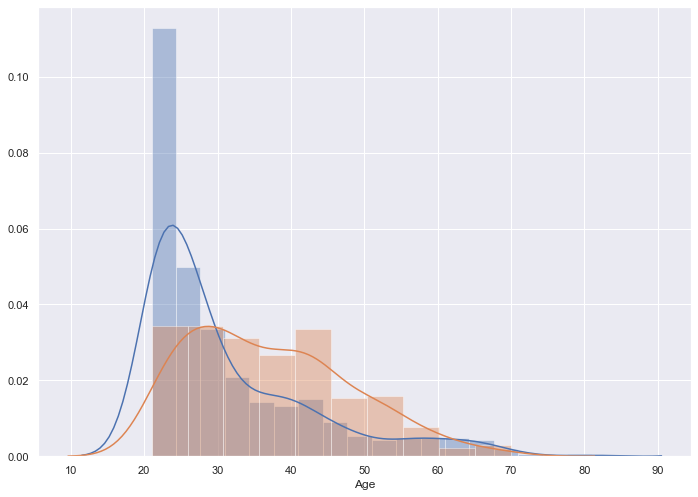

In [33]:
#Age analysis
sns.distplot(df[df["Outcome"]==0]["Age"])
sns.distplot(df[df["Outcome"]==1]["Age"])

In [34]:
df["F13"]=0
df.loc[(df["Age"]<30) | (df["Age"]>60),"F13"]=1

In [35]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,F1,F2,F3,F4,F5,F6,F7,F8,F10,F11,F12,F13
Pregnancies,1,0.129459,0.208615,0.0817698,0.0250475,0.0215587,-0.0285417,0.544341,0.221898,-0.382607,-0.453115,0.0440066,-0.114327,-0.104391,-0.0943309,-0.117853,-0.0756609,-0.0806853,-0.118418,-0.469341,-0.570945
Glucose,0.129459,1,0.21787,0.182037,0.409283,0.218487,0.115807,0.263514,0.466581,-0.204508,-0.656304,0.57942,-0.466207,-0.602107,-0.193923,-0.131328,-0.181493,-0.183955,-0.138277,0.0270852,-0.196901
BloodPressure,0.208615,0.21787,1,0.191892,0.0453633,0.281257,-0.00113518,0.324915,0.165723,-0.260236,-0.269947,0.0780551,-0.470514,-0.187032,-0.194655,-0.359792,-0.200506,-0.144446,-0.0694973,0.0426011,-0.260624
SkinThickness,0.0817698,0.182037,0.191892,1,0.15561,0.543205,0.0799283,0.126107,0.214873,-0.455574,-0.180804,0.0977249,-0.180812,-0.319842,-0.431963,-0.33844,-0.401549,-0.30491,-0.236324,0.0712338,-0.107478
Insulin,0.0250475,0.409283,0.0453633,0.15561,1,0.180241,0.102321,0.0971012,0.20379,-0.137475,-0.322306,0.237342,-0.193329,-0.265154,-0.151446,-0.0594381,-0.150156,-0.120312,-0.103735,0.00864006,-0.0956454
BMI,0.0215587,0.218487,0.281257,0.543205,0.180241,1,0.146343,0.0255969,0.312038,-0.61466,-0.187522,0.10169,-0.223879,-0.247369,-0.695479,-0.203321,-0.717307,-0.585058,-0.444861,0.161996,-0.0915733
DiabetesPedigreeFunction,-0.0285417,0.115807,-0.00113518,0.0799283,0.102321,0.146343,1,0.0388307,0.180612,-0.0657626,-0.105174,0.102982,-0.067068,-0.0468132,-0.106799,-0.0278924,-0.110247,-0.0927991,-0.092858,0.0476093,-0.0522592
Age,0.544341,0.263514,0.324915,0.126107,0.0971012,0.0255969,0.0388307,1,0.238356,-0.277362,-0.409831,0.136634,-0.224887,-0.205529,-0.056922,-0.169655,-0.04018,-0.0552417,-0.0654955,-0.197159,-0.592005
Outcome,0.221898,0.466581,0.165723,0.214873,0.20379,0.312038,0.180612,0.238356,1,-0.28469,-0.417418,0.282524,-0.246644,-0.30522,-0.295264,-0.164712,-0.291273,-0.248329,-0.186427,-0.00570535,-0.310898
F1,-0.382607,-0.204508,-0.260236,-0.455574,-0.137475,-0.61466,-0.0657626,-0.277362,-0.28469,1,0.299131,-0.107859,0.221248,0.222459,0.504123,0.212452,0.505628,0.35317,0.295972,-0.0134864,0.303221


In [36]:
#Assuming 1 is minority class
#Defining function for random Under and oversampling

def ROS(train_df,r=1):
    
    train_df_0=train_df[train_df['Outcome']==0]
    train_df_1=train_df[train_df['Outcome']==1]
    
    train_df_1_over=train_df_1.sample(round(r*len(train_df_0)),replace=True,random_state=1)
    
    df_=pd.concat([train_df_1_over,train_df_0])
                                       
    
    return df_

def RUS(train_df,r=1):
    
    train_df_0=train_df[train_df['Outcome']==0]
    train_df_1=train_df[train_df['Outcome']==1]
    
    train_df_0_under=train_df_0.sample(round(len(train_df_1)/r),replace=True,random_state=1)
    
    df_=pd.concat([train_df_0_under,train_df_1])
                                       
    
    return df_

def SMOTE_(train_df,r=1):
    
    len_=len(train_df[train_df['Outcome']==0])
    
    sm=SMOTE(sampling_strategy=(len_*r)/len_,random_state=42)
    a,b=sm.fit_resample(train_x,train_y)         
    
    col=train_df.drop(columns=['Outcome']).columns
    df_=pd.concat([pd.DataFrame(a,columns=col),pd.DataFrame(b,columns=['Outcome'])],sort=False,axis=1)        
             
    return df_

def ADASYN_(train_df,r=1):
    
    len_=len(train_df[train_df['Outcome']==0])
    
    sm=ADASYN(sampling_strategy=(len_*r)/len_,random_state=42)
    a,b=sm.fit_resample(train_x,train_y)         
    
    col=train_df.drop(columns=['Outcome']).columns
    df_=pd.concat([pd.DataFrame(a,columns=col),pd.DataFrame(b,columns=['Outcome'])],sort=False,axis=1)        
             
    return df_

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score

score_f1=make_scorer(f1_score)

def clf_(train_df,param,clf,split,score):
    
    col=train_df.drop(columns=['Outcome']).columns
    
    cv=StratifiedKFold(n_splits=split,random_state=345)
    grid=GridSearchCV(estimator=clf,param_grid=param,cv=cv.split(train_df[col],train_df['Outcome']),scoring=score,n_jobs=-1)
    
    grid.fit(train_df[col],train_df['Outcome'])
    
    print("######Best Param######",grid.best_params_,"##########BEST F1 Score#######",grid.best_score_)
    
    clf_best=grid.best_estimator_
    
    return clf_best


def execute(train_df,test_df,param,clf,split,score):
    
        col=train_df.drop(columns=['Outcome']).columns
    
        clf=clf_(train_df,param,clf,split,score)
        clf_fit=clf.fit(train_df[col],train_df['Outcome'])
        
        pred=clf_fit.predict(test_df[col])
        
        plot_confusion_matrix(clf_fit,test_df[col],test_df['Outcome'])
        plot_precision_recall_curve(clf_fit,test_df[col],test_df['Outcome'])
        
        print("##### Accuracy is #### ",accuracy_score(test_df['Outcome'],pred))
        
        f1_score(test_df['Outcome'], pred, average='weighted')
        
        prob_test = clf_fit.predict_proba(test_df[col])[:, 1]
        roc_value_test = roc_auc_score(test_df['Outcome'], prob_test)
        print("#####ROC SCORE####",roc_value_test)
        
        return clf_fit
        

In [38]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
import time

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100} ##########BEST F1 Score####### 0.8727514144226092
##### Accuracy is ####  0.7402597402597403
#####ROC SCORE#### 0.8268518518518518
############### Time taken is ############### 64.82352471351624


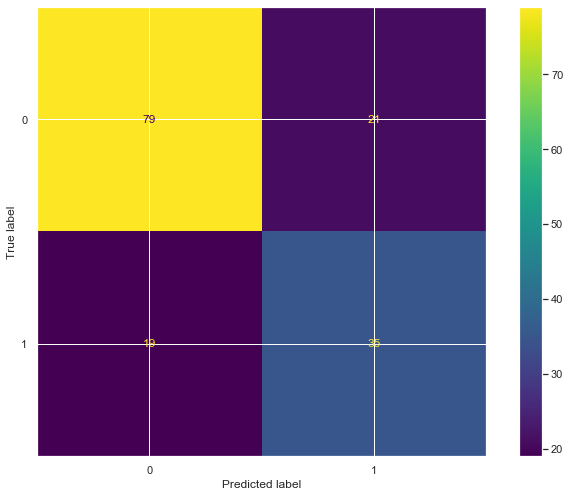

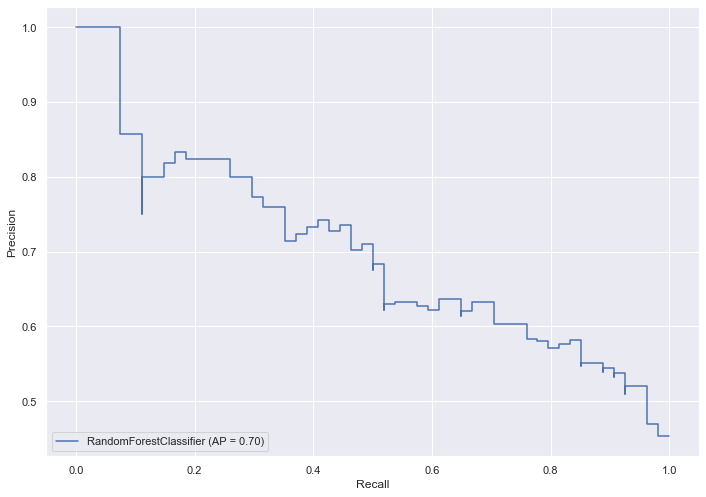

In [104]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500} ##########BEST F1 Score####### 0.8301430176013971
##### Accuracy is ####  0.7662337662337663
############### Time taken is ############### 67.075923204422


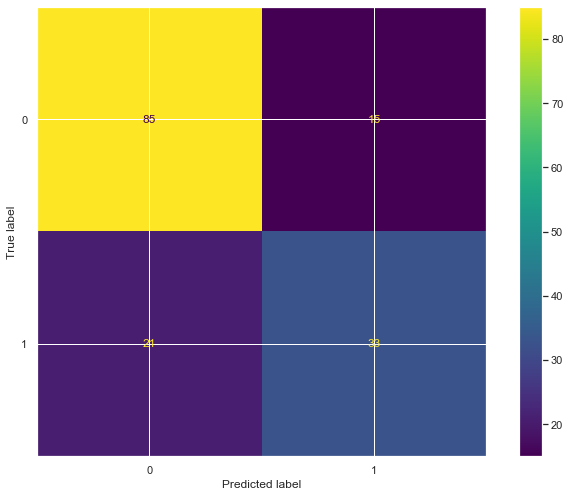

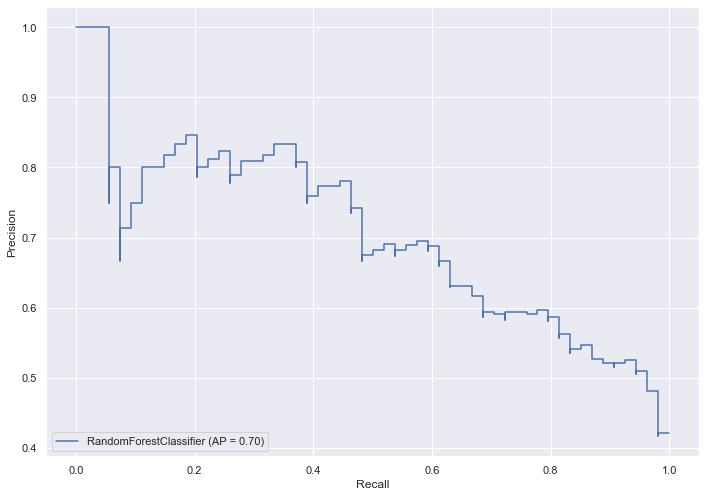

In [86]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=4/6)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100} ##########BEST F1 Score####### 0.7935425345881407
##### Accuracy is ####  0.7337662337662337
############### Time taken is ############### 61.85235643386841


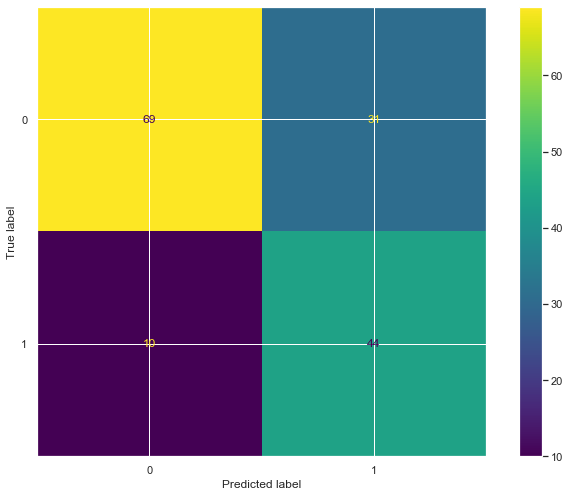

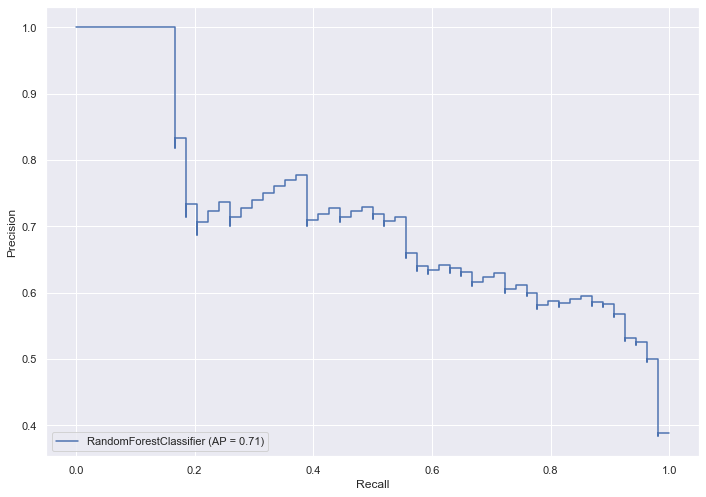

In [87]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=RUS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500} ##########BEST F1 Score####### 0.7493957645584961
##### Accuracy is ####  0.7597402597402597
############### Time taken is ############### 63.88265562057495


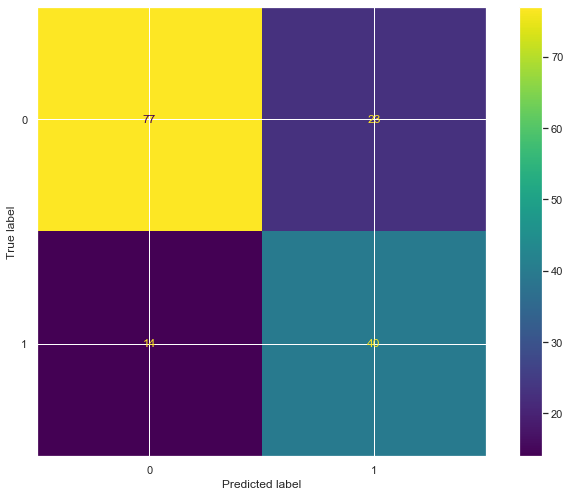

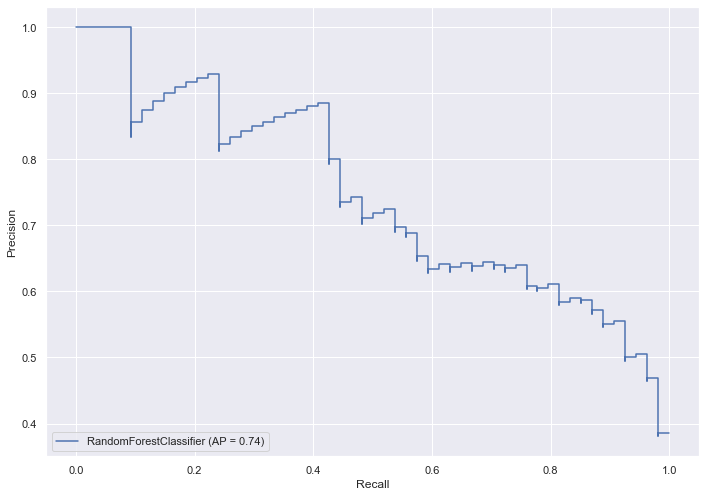

In [88]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=RUS(train_df,r=4/6)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

# Droping Features with less correlation ######

In [96]:
corr = df.corr()
columns=corr[np.abs(corr["Outcome"])>.2]["Outcome"].index
train_df=train_df[columns]
#corr.style.background_gradient(cmap='coolwarm')

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 700} ##########BEST F1 Score####### 0.8703245295715749
##### Accuracy is ####  0.7532467532467533
############### Time taken is ############### 74.25826787948608


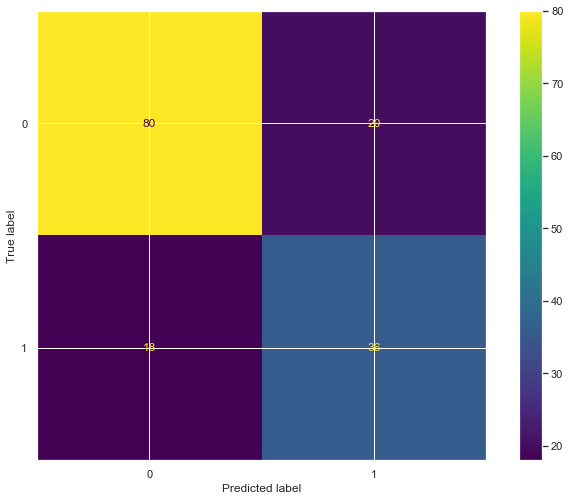

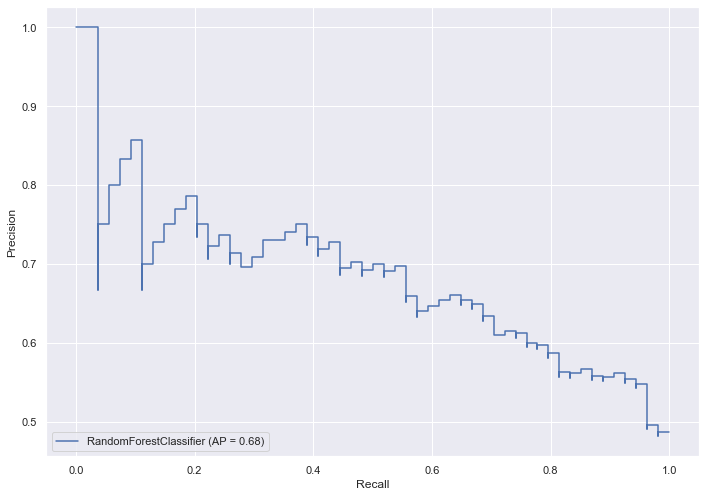

In [97]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300} ##########BEST F1 Score####### 0.8280458075015688
##### Accuracy is ####  0.7272727272727273
############### Time taken is ############### 62.190356969833374


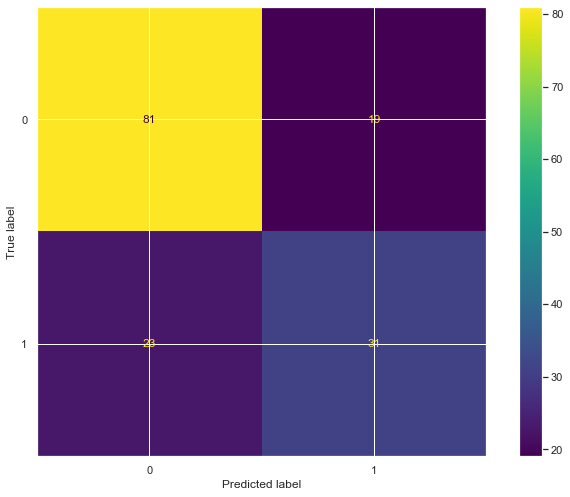

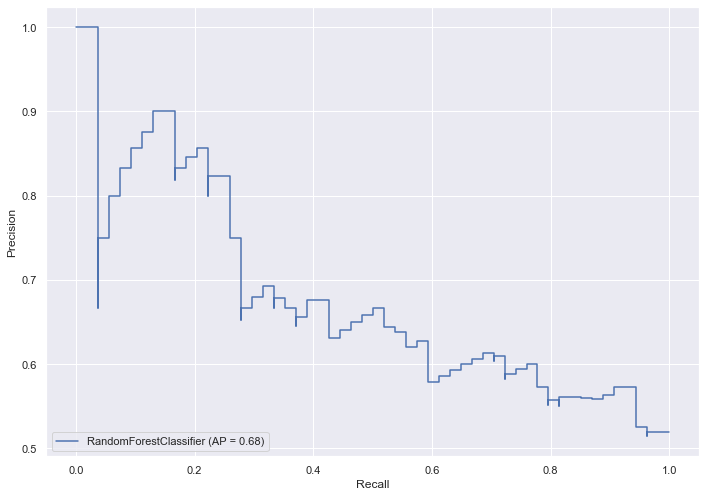

In [98]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=4/6)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} ##########BEST F1 Score####### 0.7766188247999625
##### Accuracy is ####  0.7142857142857143
############### Time taken is ############### 58.4043915271759


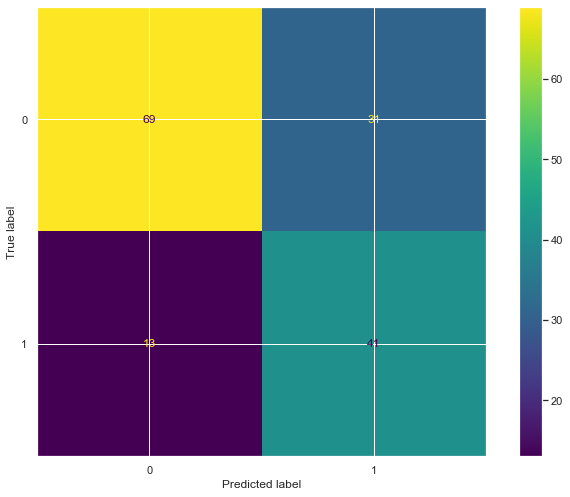

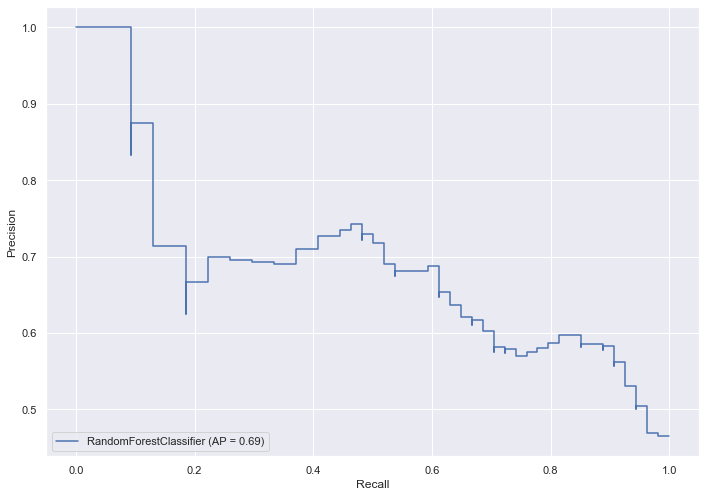

In [99]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=RUS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300} ##########BEST F1 Score####### 0.7414412124068274
##### Accuracy is ####  0.7337662337662337
############### Time taken is ############### 62.999537229537964


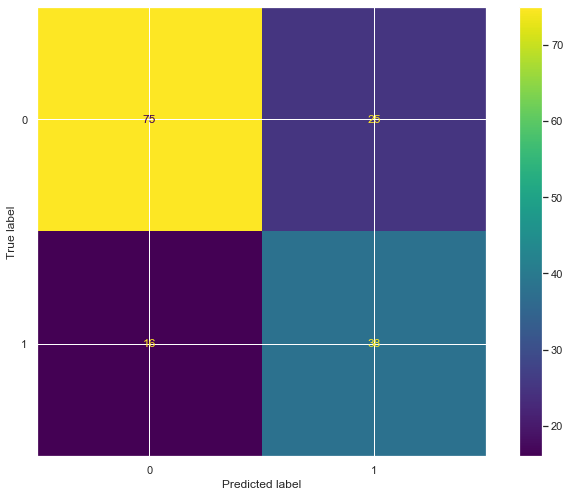

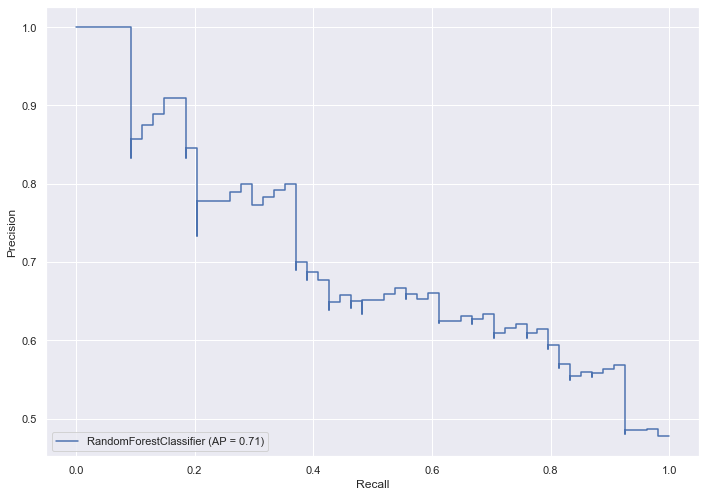

In [100]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=RUS(train_df,r=4/6)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

# Creating New Feature from Kaggle

In [110]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']

In [112]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} ##########BEST F1 Score####### 0.8768762163187024
##### Accuracy is ####  0.7467532467532467
#####ROC SCORE#### 0.807962962962963
############### Time taken is ############### 80.5789680480957


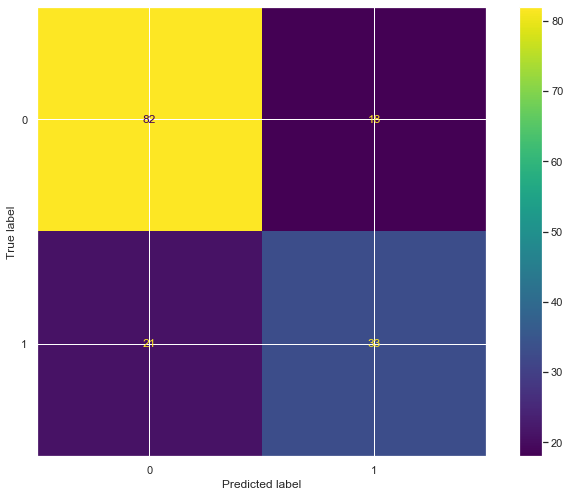

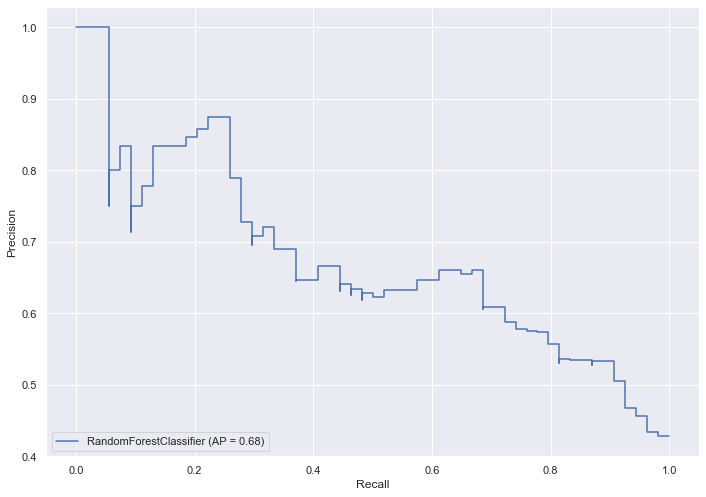

In [113]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

# Trying Polynomial Fit

In [51]:
###Dropping columns ####
#df=df.drop(columns=['N0', 'N8','N13', 'N12', 'N14'])
x=df.drop(columns=['Outcome'])
y=df['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'F1', 'F2', 'F3',
       'F4', 'F5', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13'],
      dtype='object')

In [53]:
from sklearn.preprocessing import PolynomialFeatures
col=x.columns
org_col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
feature_col=['F1', 'F2', 'F3','F4', 'F5', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13']

temp_x=df.drop(columns=['Outcome'])[org_col]
temp_x=PolynomialFeatures(degree=2).fit_transform(temp_x)

temp_x=pd.DataFrame(temp_x)
temp_x=pd.concat([temp_x,df[feature_col]],axis=1)

new_df=pd.concat([temp_x,y],axis=1,sort=False)
#Still need to correct for dataframe column name

In [143]:
x=new_df.drop(columns=['Outcome'])
y=new_df['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 700} ##########BEST F1 Score####### 0.8730757291383104
##### Accuracy is ####  0.6883116883116883
#####ROC SCORE#### 0.8059259259259259
############### Time taken is ############### 111.97708129882812


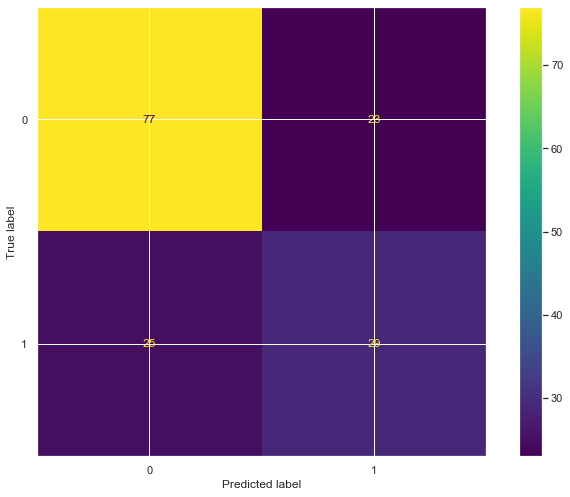

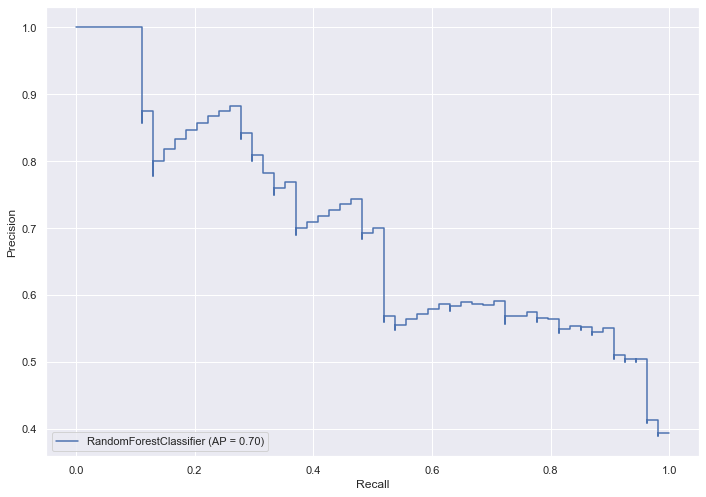

In [144]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[100,300,500,700,900],"max_features":['auto','sqrt','log2'],"min_samples_split":[i for i in range(2,30,4)]}

df_=ROS(train_df,r=1)

execute(df_,test_df,param,clf,5)
print("############### Time taken is ###############",time.time()-start_time)

# Logistic regression

In [65]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'F1', 'F2', 'F3',
       'F4', 'F5', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13'],
      dtype='object')

In [54]:
#Applying min max scalar on Continuous variable
from sklearn.preprocessing import MinMaxScaler
score_lr=make_scorer("log_loss")

feat_cont=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
other_cont=['F1', 'F2', 'F3','F4', 'F5', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13','Outcome']

scaler=MinMaxScaler()
data=scaler.fit_transform(df[feat_cont])

#New Data Set 
df_lr=pd.concat([pd.DataFrame(data),df[other_cont]],axis=1)
df_lr.head()

,0,1,2,3,4,5,6,7,F1,F2,...,F4,F5,F6,F7,F8,F10,F11,F12,F13,Outcome
0,0.352941,0.743719,0.489796,0.304348,0.133413,0.314928,0.606798,0.483333,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.058824,0.427136,0.428571,0.239130,0.133413,0.171779,0.437892,0.166667,1,1,...,0,1,1,0,1,0,0,0,0,0
2,0.470588,0.919598,0.408163,0.239130,0.133413,0.104294,0.626977,0.183333,0,0,...,0,0,1,0,1,1,0,0,0,1
3,0.058824,0.447236,0.428571,0.173913,0.096154,0.202454,0.221638,0.000000,1,1,...,0,1,0,0,0,0,0,0,1,0
4,0.000000,0.688442,0.163265,0.304348,0.185096,0.509202,0.983670,0.200000,0,0,...,0,0,0,0,0,0,0,1,0,1


In [109]:
x=df_lr.drop(columns=['Outcome'])
y=df_lr['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1000, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7731475823180797
##### Accuracy is ####  0.7662337662337663
#####ROC SCORE#### 0.8442592592592592
############### Time taken is ############### 0.40962958335876465


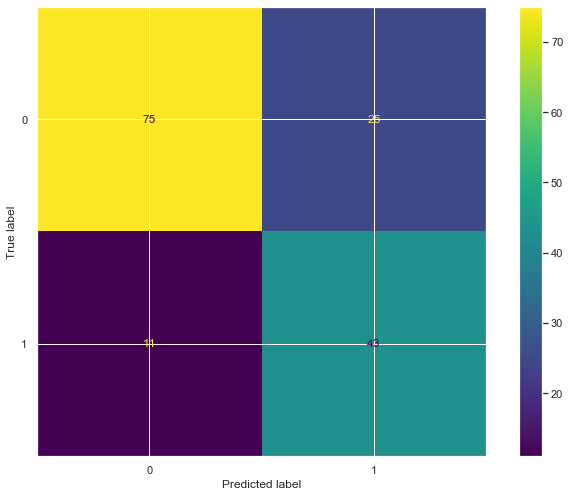

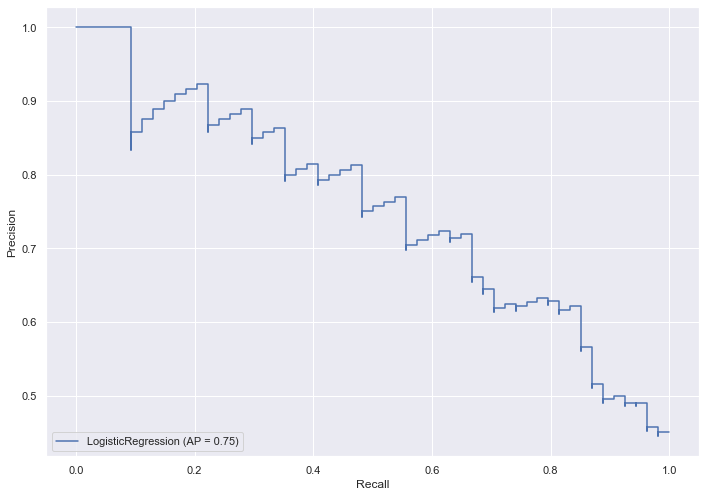

In [113]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 10, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7528564270535776
##### Accuracy is ####  0.7532467532467533
#####ROC SCORE#### 0.8483333333333334
############### Time taken is ############### 2.464677572250366


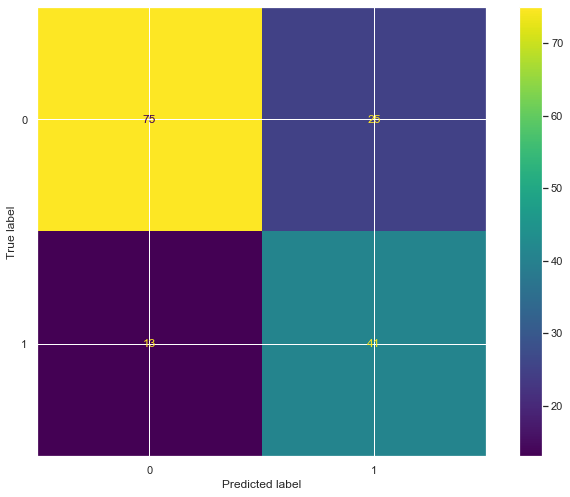

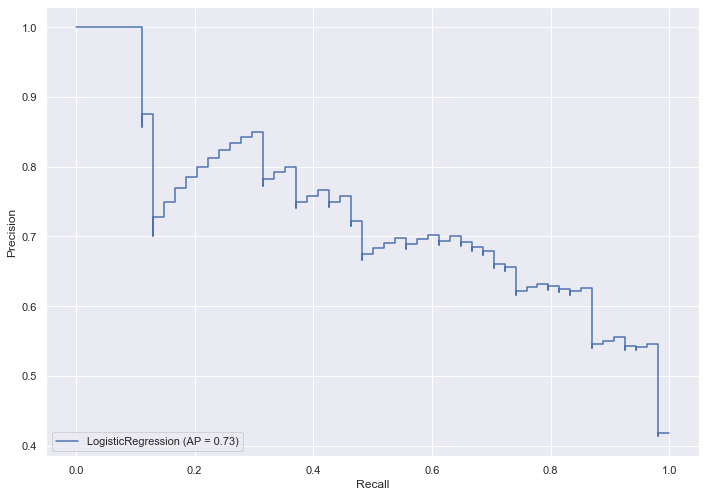

In [112]:
#Trying RUS for Sampling

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

print("############### Time taken is ###############",time.time()-start_time)

In [90]:
# Standardizing continuous variable
from sklearn import preprocessing
    
    
feat_cont=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
other_cont=['F1', 'F2', 'F3','F4', 'F5', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13','Outcome']

data=preprocessing.scale(df[feat_cont])

#New Data Set 
df_lr=pd.concat([pd.DataFrame(data),df[other_cont]],axis=1)
df_lr.head()    

,0,1,2,3,4,5,6,7,F1,F2,...,F4,F5,F6,F7,F8,F10,F11,F12,F13,Outcome
0,0.639947,0.848324,-0.031990,0.670643,-0.181541,0.166619,0.765848,1.425995,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.844885,-1.123396,-0.528319,-0.012301,-0.181541,-0.852200,-0.135159,-0.190672,1,1,...,0,1,1,0,1,0,0,0,0,0
2,1.233880,1.943724,-0.693761,-0.012301,-0.181541,-1.332500,0.873492,-0.105584,0,0,...,0,0,1,0,1,1,0,0,0,1
3,-0.844885,-0.998208,-0.528319,-0.695245,-0.540642,-0.633881,-1.288739,-1.041549,1,1,...,0,1,0,0,0,0,0,0,1,0
4,-1.141852,0.504055,-2.679076,0.670643,0.316566,1.549303,2.776227,-0.020496,0,0,...,0,0,0,0,0,0,0,1,0,1


In [91]:
x=df_lr.drop(columns=['Outcome'])
y=df_lr['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1000, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7731475823180797
##### Accuracy is ####  0.7662337662337663
#####ROC SCORE#### 0.8442592592592592
############### Time taken is ############### 0.42238712310791016


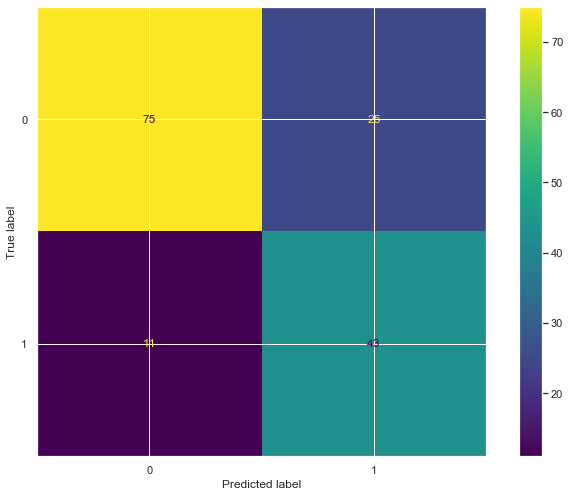

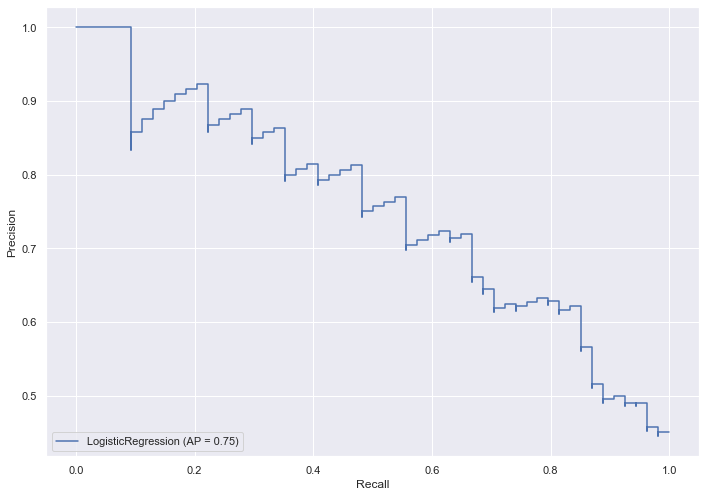

In [92]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5)

print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1000, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7492705480521915
##### Accuracy is ####  0.7597402597402597
#####ROC SCORE#### 0.8485185185185184
############### Time taken is ############### 0.33124518394470215


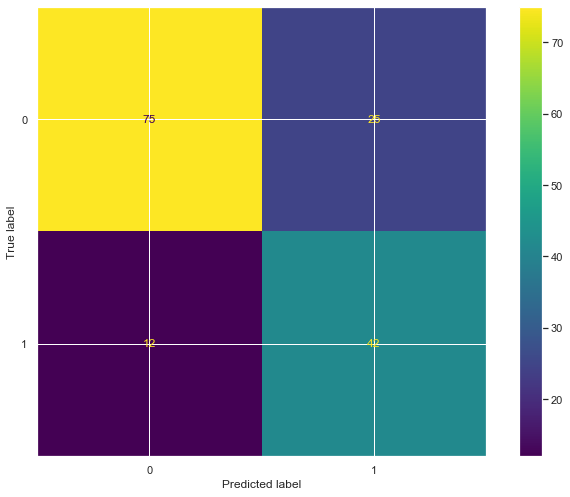

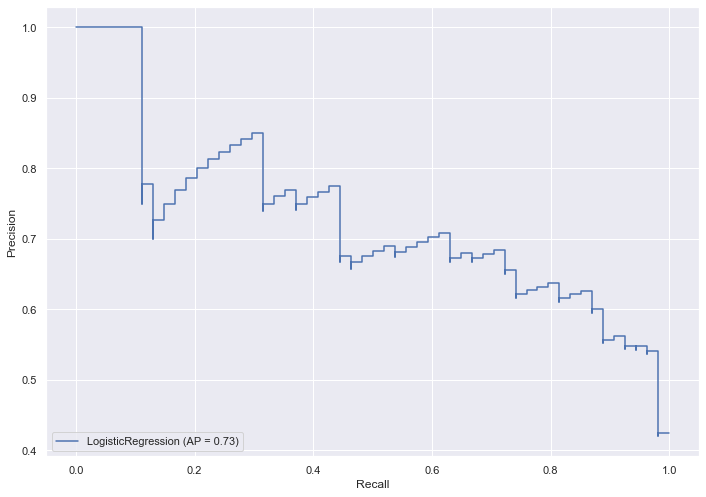

In [93]:
#Trying RUS for Sampling

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5)

print("############### Time taken is ###############",time.time()-start_time)

# Tryning two highly correlated Features

In [97]:
#Columns number 1 and 5 were highly correlated 

train_x,test_x,train_y,test_y=train_test_split(df_lr[[1,5]],df_lr['Outcome'],test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 0.01, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7035499978818447
##### Accuracy is ####  0.6883116883116883
#####ROC SCORE#### 0.7711111111111111
############### Time taken is ############### 2.4950459003448486


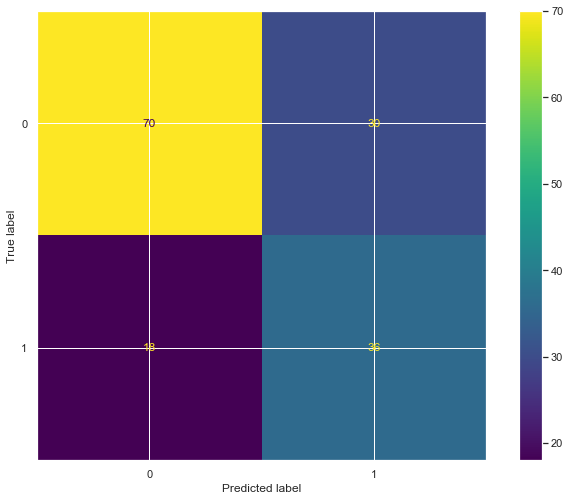

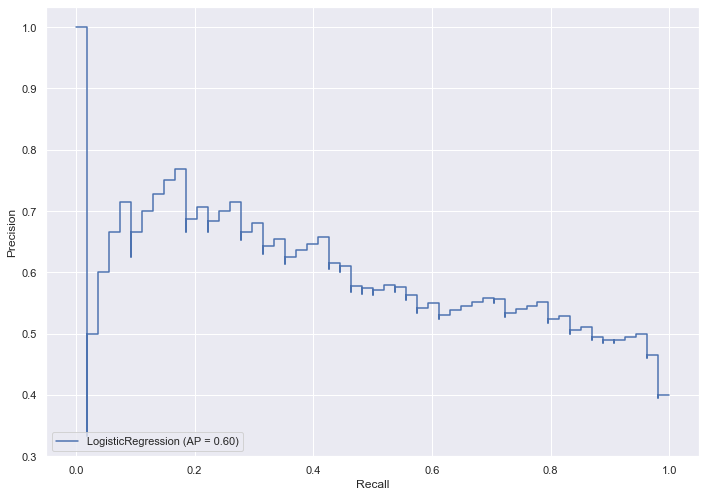

In [98]:
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5)

print("############### Time taken is ###############",time.time()-start_time)

# SVM

In [56]:
df_svm=df_lr #Min Max scaled Data Frame

x=df_svm.drop(columns=['Outcome'])
y=df_svm['Outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1, 'gamma': 30} ##########BEST F1 Score####### 0.8686232303987722
##### Accuracy is ####  0.7142857142857143


AttributeError: predict_proba is not available when  probability=False

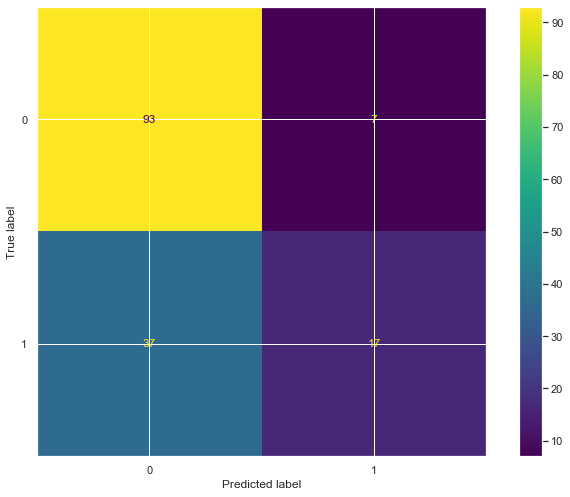

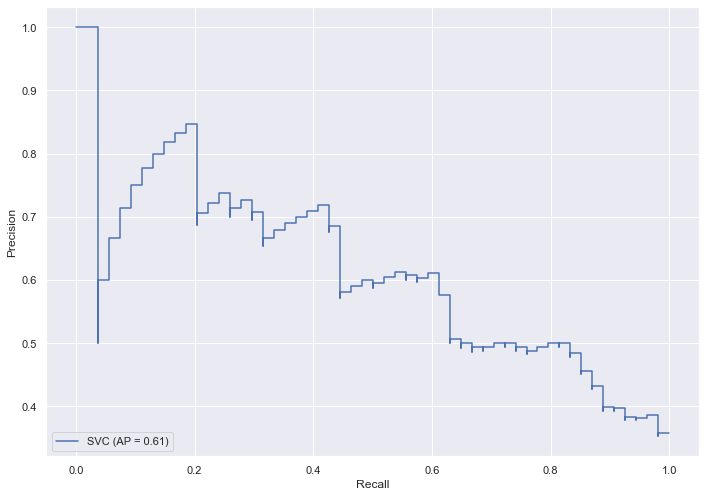

In [65]:
from sklearn.svm import SVC
clf=SVC()

start_time=time.time()

param={"C":[.001,.01,.1,1,10,100,1000],"gamma":[1,10,20,30,20]}
#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


print("############### Time taken is ###############",time.time()-start_time)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1, 'gamma': 1} ##########BEST F1 Score####### 0.7484280882514499
##### Accuracy is ####  0.7662337662337663


AttributeError: predict_proba is not available when  probability=False

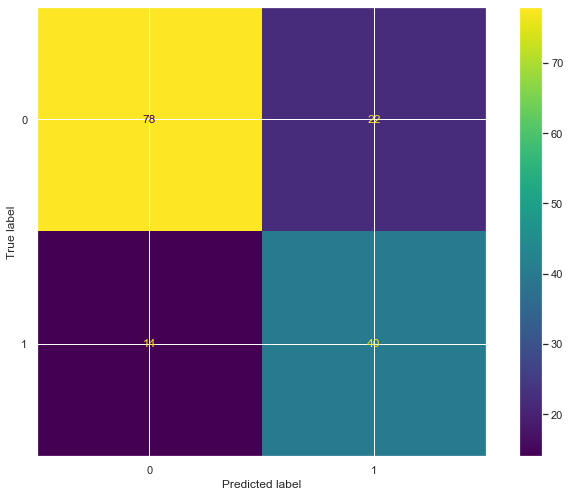

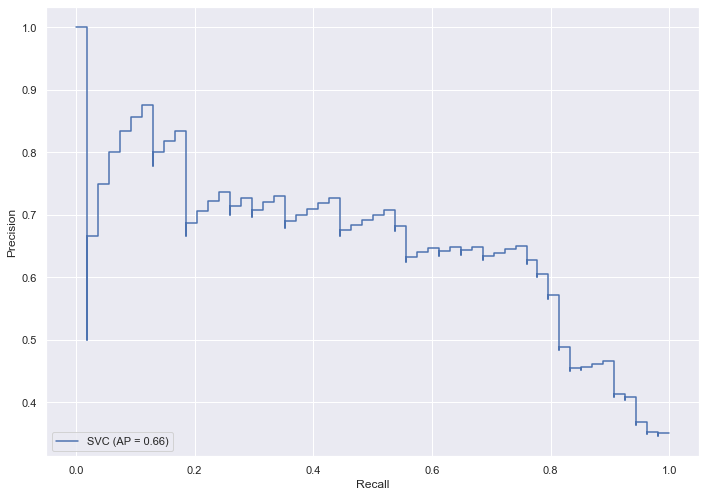

In [66]:
from sklearn.svm import SVC
clf=SVC()

start_time=time.time()

param={"C":[.001,.01,.1,1,10,100,1000],"gamma":[1,10,20,30,20]}
#RUS
df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


print("############### Time taken is ###############",time.time()-start_time)

# Gradient Boosting

In [40]:
https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

SyntaxError: invalid syntax (<ipython-input-40-623bfc99f646>, line 1)

In [43]:
#Tuning for N_estimators

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 300} ##########BEST F1 Score####### 0.8594703228826898
##### Accuracy is ####  0.7467532467532467
#####ROC SCORE#### 0.8183333333333332


GradientBoostingClassifier(n_estimators=300)

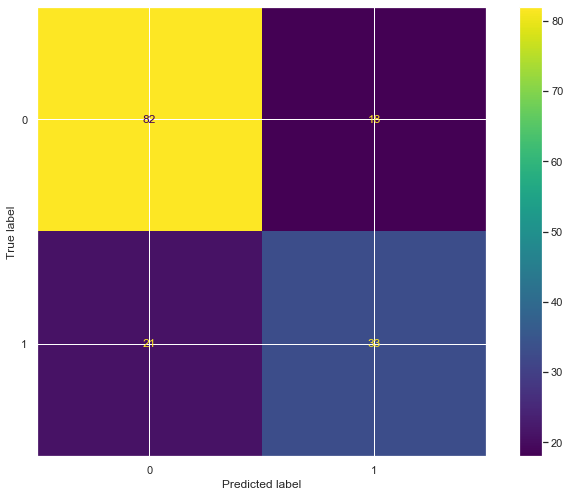

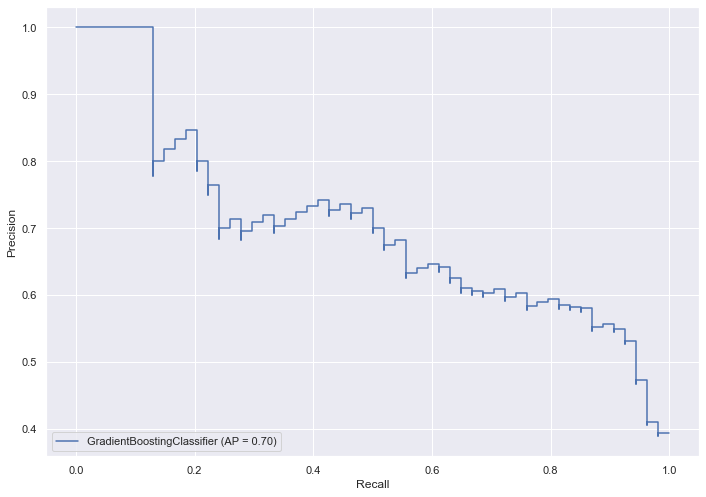

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance', 'exponential'],'n_estimators':[100,200,300,400,500,600,700],'learning_rate':[.1]}

#RUS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

In [53]:
#Fixing learning Rate and number of estimators and optimizing  min sample split and min_sample_leaf 

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'loss': 'deviance', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 300} ##########BEST F1 Score####### 0.86305981166107
##### Accuracy is ####  0.7272727272727273
#####ROC SCORE#### 0.82


GradientBoostingClassifier(min_samples_leaf=10, min_samples_split=4,
                           n_estimators=300)

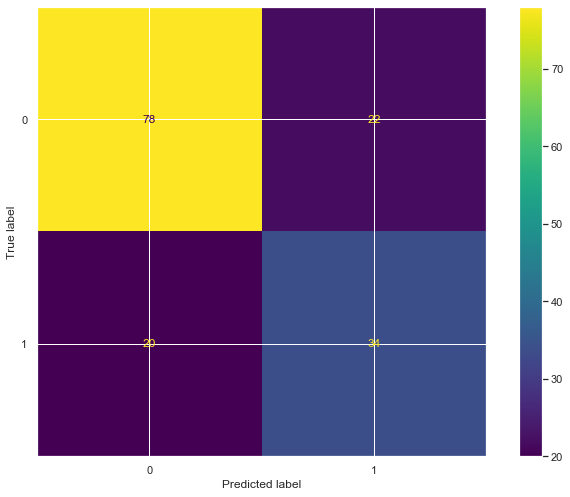

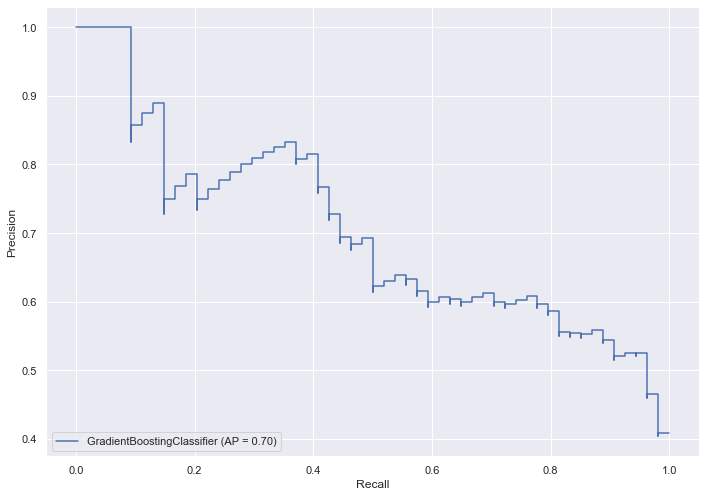

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[300],'min_samples_split':[4,8,16,32,40],'min_samples_leaf':[2,4,6,8,10,12,14,16,18,20]}

#RUS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

In [46]:
#Tuning Learning Rate

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.03, 'loss': 'deviance', 'min_samples_leaf': 11, 'min_samples_split': 4, 'n_estimators': 300} ##########BEST F1 Score####### 0.8290969672242623
##### Accuracy is ####  0.7467532467532467
#####ROC SCORE#### 0.8266666666666667


GradientBoostingClassifier(learning_rate=0.03, min_samples_leaf=11,
                           min_samples_split=4, n_estimators=300)

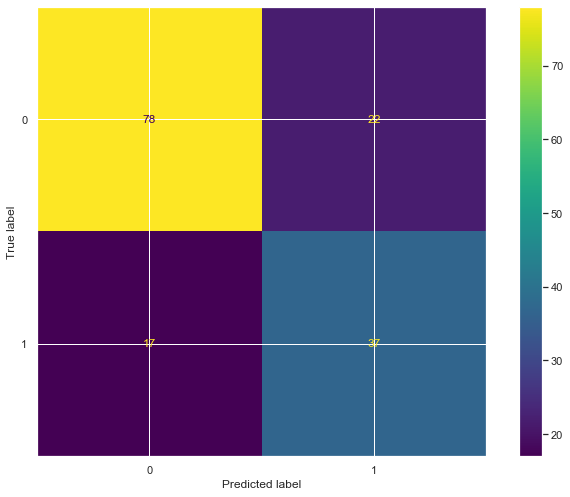

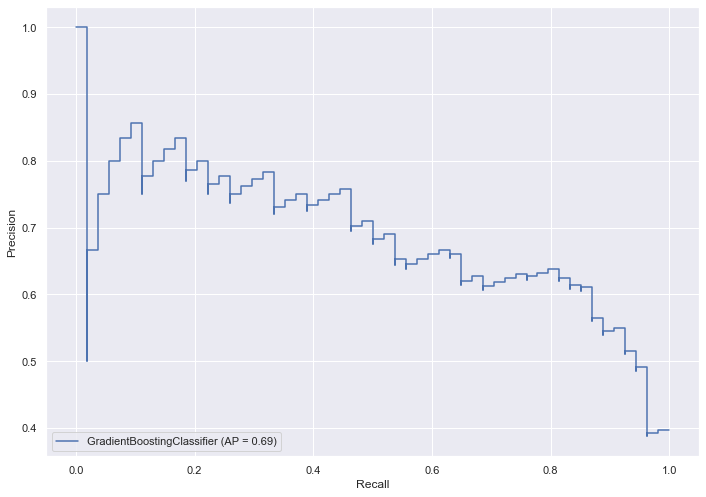

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[300],'min_samples_split':[4],'min_samples_leaf':[11],'learning_rate':[.02,.03]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.03, 'loss': 'deviance', 'min_samples_leaf': 11, 'min_samples_split': 4, 'n_estimators': 300, 'subsample': 1} ##########BEST F1 Score####### 0.8290969672242623
##### Accuracy is ####  0.7467532467532467
#####ROC SCORE#### 0.8266666666666667


GradientBoostingClassifier(learning_rate=0.03, min_samples_leaf=11,
                           min_samples_split=4, n_estimators=300, subsample=1)

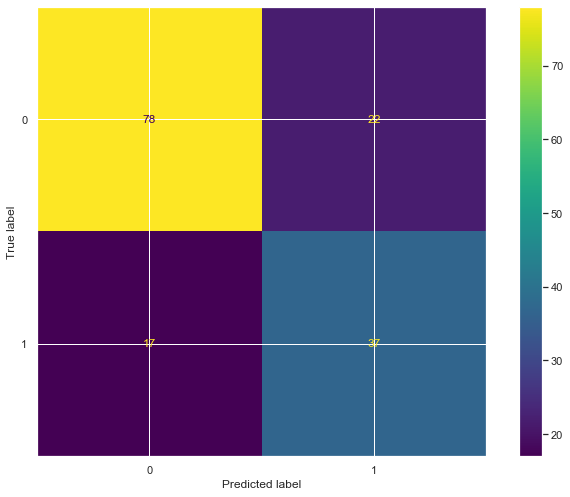

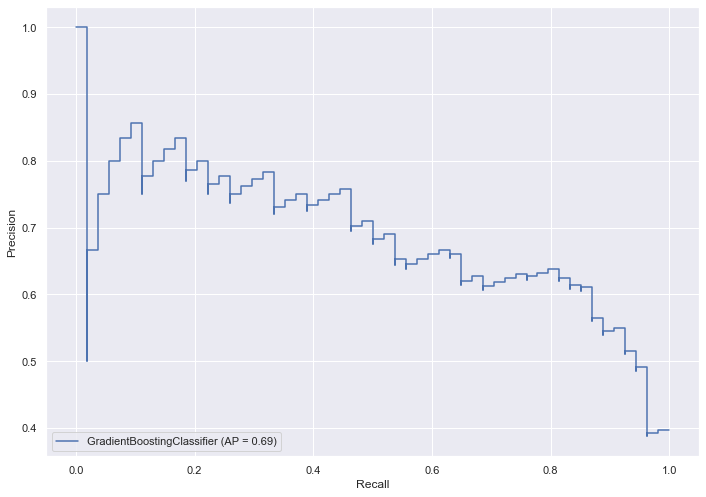

In [56]:
#Tuning Subsample

from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[300],'min_samples_split':[4],'min_samples_leaf':[11],'learning_rate':[.02,.03],'subsample':[1,.9,.8,.7,.6]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

#  Decision Tree

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2} ##########BEST F1 Score####### 0.8040597979923746
##### Accuracy is ####  0.7727272727272727
#####ROC SCORE#### 0.7511111111111111


DecisionTreeClassifier(max_features='log2', min_samples_leaf=2)

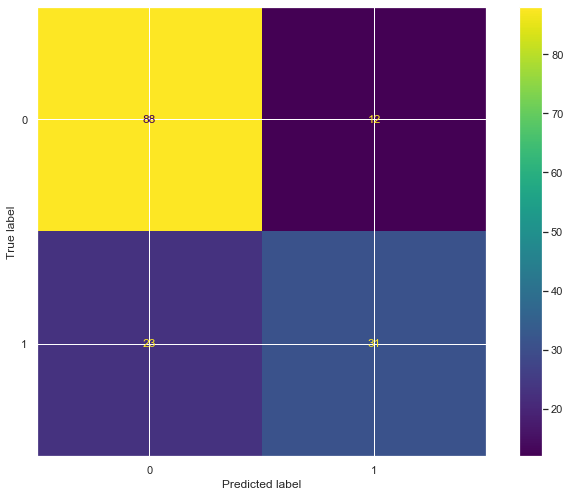

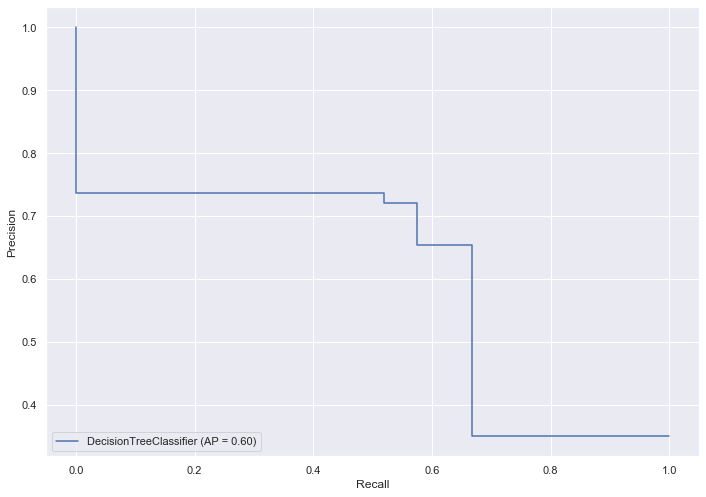

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

start_time=time.time()

param={'min_samples_split':[2,4,8,16,32,50],'min_samples_leaf':[2,3,4,5,6,7],'max_features':['None', 'sqrt', 'log2']}


#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 8} ##########BEST F1 Score####### 0.7808078701954745
##### Accuracy is ####  0.6623376623376623
#####ROC SCORE#### 0.7527777777777778


DecisionTreeClassifier(max_features='log2', max_leaf_nodes=7,
                       min_samples_leaf=4, min_samples_split=8)

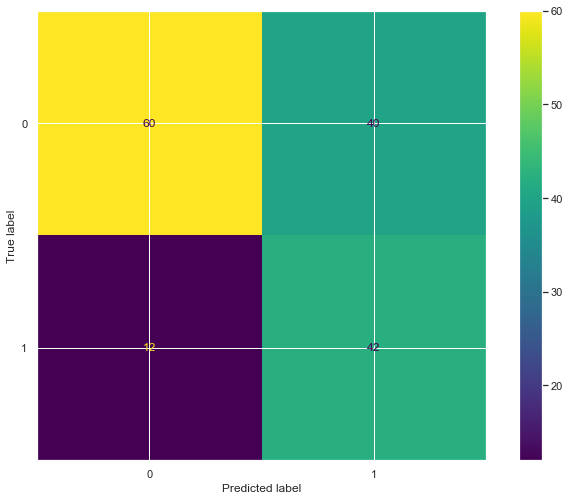

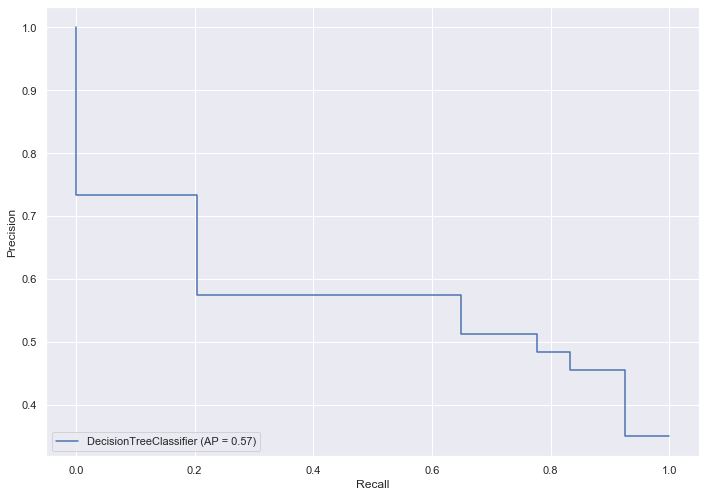

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

start_time=time.time()

param={'min_samples_split':[2,4,8,16,32,50],'min_samples_leaf':[2,3,4,5,6,7],'max_leaf_nodes':[2,3,4,5,6,7],'max_features':['None', 'sqrt', 'log2']}


#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

In [63]:
#Above is classifieng minority class good


# XGBoost

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'n_estimators': 400} ##########BEST F1 Score####### 0.8588494624144971
##### Accuracy is ####  0.7077922077922078
#####ROC SCORE#### 0.8072222222222222


XGBClassifier(eta=0.1, n_estimators=400)

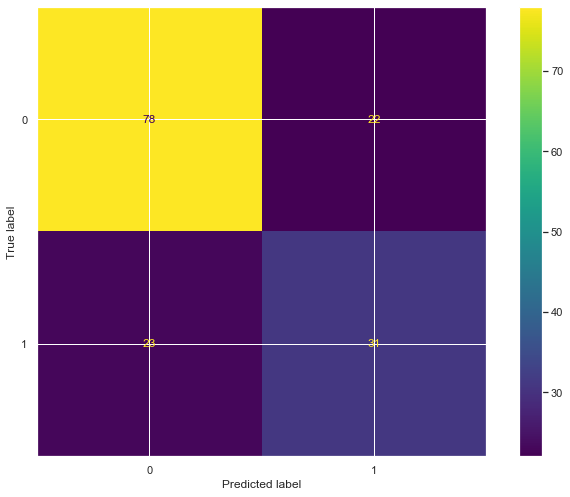

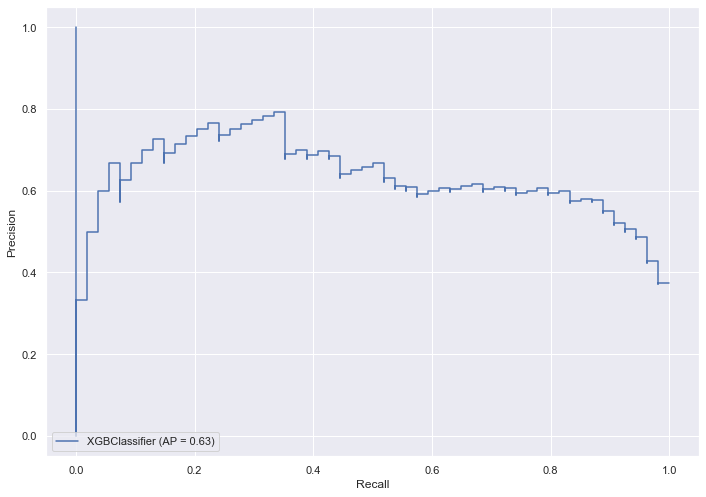

In [40]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[i for i in range(0,1000,100)]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

In [42]:
#Tuning for Tree based Parameter

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 400} ##########BEST F1 Score####### 0.8680142411424608
##### Accuracy is ####  0.7272727272727273
#####ROC SCORE#### 0.804074074074074


XGBClassifier(eta=0.1, max_depth=9, n_estimators=400)

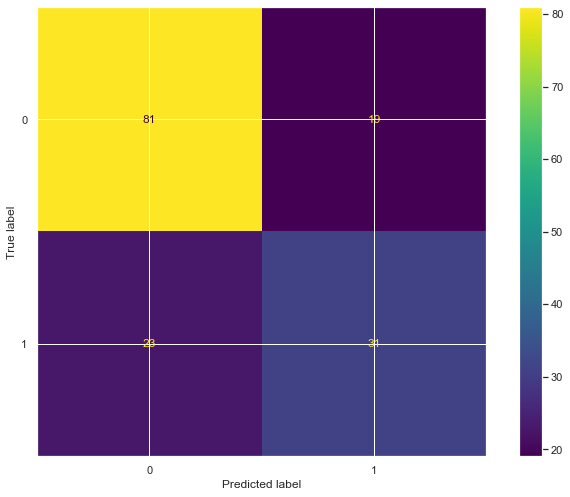

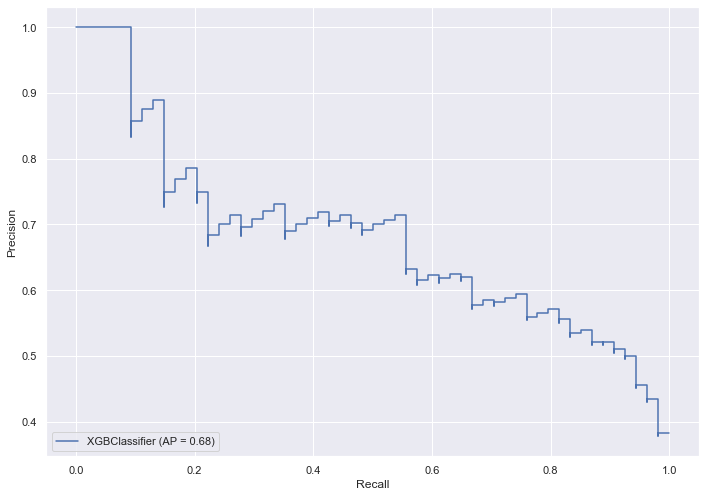

In [43]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[400],'max_depth':range(3,10,2),'min_child_weight':range(1,12,2)}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400} ##########BEST F1 Score####### 0.8570113606717799
##### Accuracy is ####  0.7272727272727273
#####ROC SCORE#### 0.8096296296296297


XGBClassifier(eta=0.1, gamma=0.2, max_depth=5, n_estimators=400)

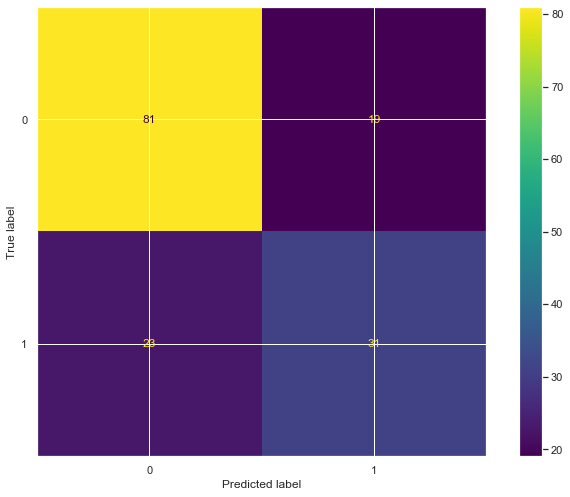

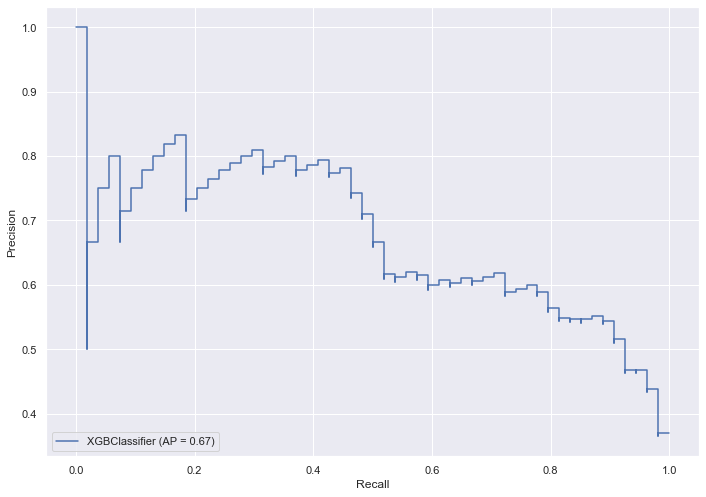

In [44]:
#Tuning for gamma

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[400],'max_depth':[5],'min_child_weight':[1],'gamma':[0,.2,.4,.6,.8,1]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.4} ##########BEST F1 Score####### 0.8646240266704528
##### Accuracy is ####  0.7402597402597403
#####ROC SCORE#### 0.8029629629629629


XGBClassifier(colsample_bytree=0.6, eta=0.1, gamma=0.2, max_depth=5,
              n_estimators=400, subsample=0.4)

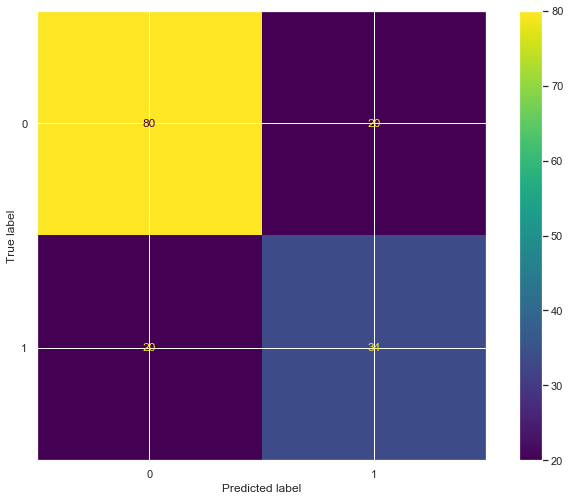

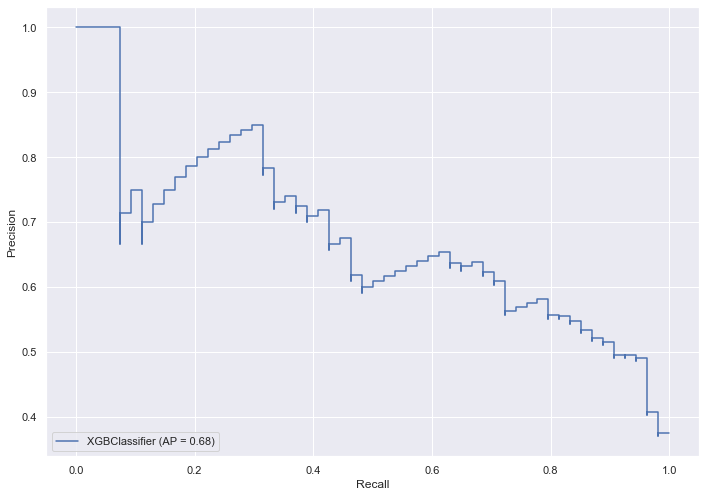

In [46]:
#Tuning for subsample and colsample_bytree

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[400],'max_depth':[5],'min_child_weight':[1],'gamma':[.2],'subsample':[1,.8,.6,.4],'colsample_bytree':[1,.8,.6,.4]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 1e-05, 'subsample': 0.4} ##########BEST F1 Score####### 0.8646240266704528
##### Accuracy is ####  0.7402597402597403
#####ROC SCORE#### 0.8029629629629629


XGBClassifier(colsample_bytree=0.6, eta=0.1, gamma=0.2, max_depth=5,
              n_estimators=400, reg_alpha=1e-05, subsample=0.4)

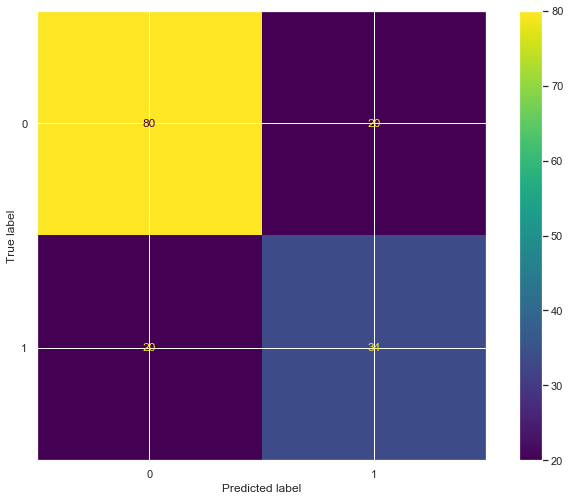

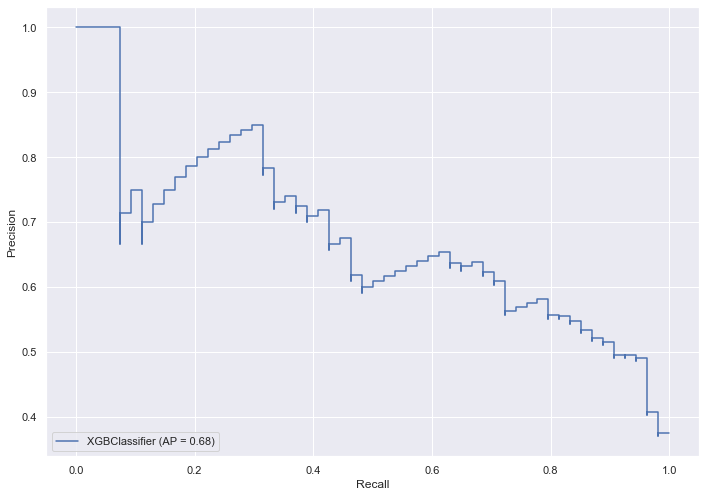

In [58]:
#Tuning Regyuularization param

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[400],'max_depth':[5],'min_child_weight':[1],'gamma':[.2],'subsample':[.4],'colsample_bytree':[.6],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.6, 'eta': 0.02, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 1e-05, 'subsample': 0.4} ##########BEST F1 Score####### 0.8646240266704528
##### Accuracy is ####  0.7402597402597403
#####ROC SCORE#### 0.8029629629629629


XGBClassifier(colsample_bytree=0.6, eta=0.02, gamma=0.2, max_depth=5,
              n_estimators=400, reg_alpha=1e-05, subsample=0.4)

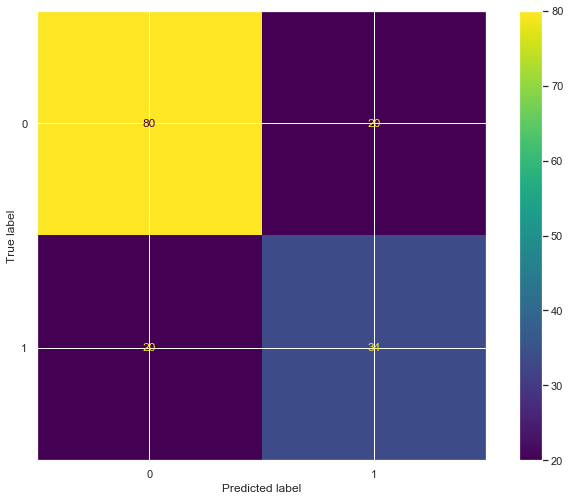

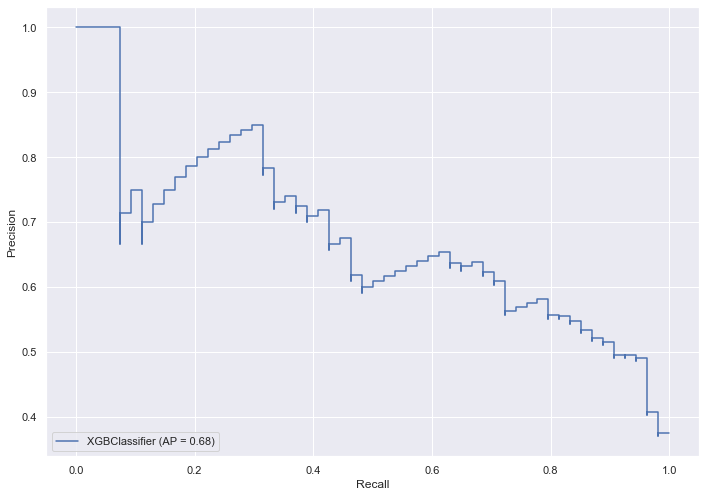

In [57]:
# tuning learning rate

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.02,.04,.06,.08],'n_estimators':[400],'max_depth':[5],'min_child_weight':[1],'gamma':[.2],'subsample':[.4],'colsample_bytree':[.6],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.6, 'eta': 0.02, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 1e-05, 'subsample': 0.4} ##########BEST F1 Score####### 0.8646240266704528
##### Accuracy is ####  0.7402597402597403
#####ROC SCORE#### 0.8029629629629629


XGBClassifier(colsample_bytree=0.6, eta=0.02, gamma=0.2, max_depth=5,
              n_estimators=400, reg_alpha=1e-05, subsample=0.4)

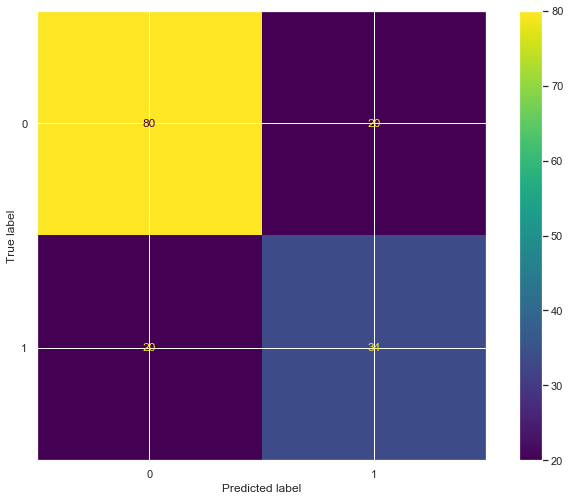

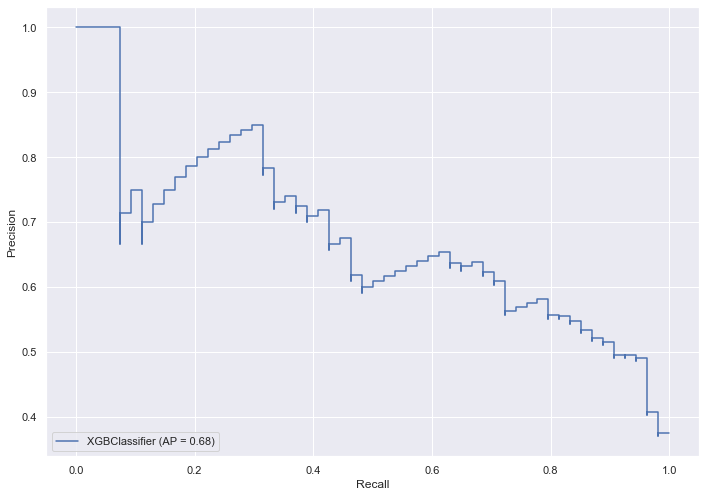

In [56]:
#tuning n_estimators

# tuning learning rate

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.02,.04,.06,.08],'n_estimators':[400,500,600,700],'max_depth':[5],'min_child_weight':[1],'gamma':[.2],'subsample':[.4],
       'colsample_bytree':[.6],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


In [45]:
import lightgbm

start_time=time.time()

#ROS
df_=ROS(train_df,r=1)

train_data = lightgbm.Dataset(df_.iloc[:,:-1], label=df_.iloc[:,-1])
test_data = lightgbm.Dataset(test_df.iloc[:,:-1], label=test_df.iloc[:,-1])

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                      early_stopping_rounds=100)


[1]	valid_0's auc: 0.764259
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.812963
[3]	valid_0's auc: 0.823148
[4]	valid_0's auc: 0.835185
[5]	valid_0's auc: 0.83463
[6]	valid_0's auc: 0.824167
[7]	valid_0's auc: 0.836944
[8]	valid_0's auc: 0.835278
[9]	valid_0's auc: 0.824722
[10]	valid_0's auc: 0.826389
[11]	valid_0's auc: 0.828611
[12]	valid_0's auc: 0.821019
[13]	valid_0's auc: 0.823426
[14]	valid_0's auc: 0.823519
[15]	valid_0's auc: 0.822593
[16]	valid_0's auc: 0.822407
[17]	valid_0's auc: 0.823704
[18]	valid_0's auc: 0.821296
[19]	valid_0's auc: 0.816111
[20]	valid_0's auc: 0.813519
[21]	valid_0's auc: 0.816111
[22]	valid_0's auc: 0.815556
[23]	valid_0's auc: 0.814074
[24]	valid_0's auc: 0.814815
[25]	valid_0's auc: 0.815185
[26]	valid_0's auc: 0.814074
[27]	valid_0's auc: 0.816852
[28]	valid_0's auc: 0.817222
[29]	valid_0's auc: 0.821111
[30]	valid_0's auc: 0.819444
[31]	valid_0's auc: 0.819815
[32]	valid_0's auc: 0.818519
[33]	valid_0's auc: 

In [46]:
y=model.predict(test_df.iloc[:,:-1])


y=np.where(y>.5,1,0)
count=0
for i in range(0,len(y)):
    if y[i]==test_df.iloc[i,-1]:
        count=count+1
print(count/len(y))    

0.7727272727272727


In [61]:
import lightgbm as lgb

param_grid = {
    'num_leaves': [i for i in range(30,60,5)],
    'max_bin':[i for i in range(20,100,10)]

}


train_x=df_.iloc[:,:-1]
train_y=df_.iloc[:,-1]

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_boost_round=500, learning_rate=0.01,'max_bin':90,'num_leaves':30)

cv=StratifiedKFold(n_splits=5,random_state=345)
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=cv.split(train_x,train_y))
lgb_model = gsearch.fit(X=train_x, y=train_y)

print(lgb_model.best_params_, lgb_model.best_score_)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ayush\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'max_bin': 90, 'num_leaves': 30} 0.85


In [84]:
y=model.predict(test_df.iloc[:,:-1])


y=np.where(y>.5,1,0)
count=0
for i in range(0,len(y)):
    if y[i]==test_df.iloc[i,-1]:
        count=count+1
print(count/len(y))  

f1_score(test_df.iloc[:,-1],y)

0.7727272727272727


0.7058823529411764

In [77]:
import lightgbm as lgb

param_grid = {
'max_bin':[90],'num_leaves':[30],
'bagging_fraction':[.5,.6,.7,.8,.9],
'feature_fraction':[.5,.6,.7,.8,.9],    
'min_gain_to_split':[0,1,2,3]
}


train_x=df_.iloc[:,:-1]
train_y=df_.iloc[:,-1]

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_boost_round=500, learning_rate=0.01)

cv=StratifiedKFold(n_splits=5,random_state=345)
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=cv.split(train_x,train_y))
lgb_model = gsearch.fit(X=train_x, y=train_y)

print(lgb_model.best_params_, lgb_model.best_score_)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ayush\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'bagging_fraction': 0.5, 'feature_fraction': 0.8, 'max_bin': 90, 'min_gain_to_split': 0, 'num_leaves': 30} 0.8487500000000001


In [82]:
y=model.predict(test_df.iloc[:,:-1])


y=np.where(y>.5,1,0)
count=0
for i in range(0,len(y)):
    if y[i]==test_df.iloc[i,-1]:
        count=count+1
print(count/len(y))  


f1_score(test_df.iloc[:,-1],y)

0.7727272727272727


0.7058823529411764

In [70]:
import lightgbm as lgb

param_grid = {
'max_bin':[90],'num_leaves':[30],
'bagging_fraction':[.5],
'feature_fraction':[1],    
'min_gain_to_split':[0],
'lambda_l1':[.001,.01,.1,1,10,100,1000]
}


train_x=df_.iloc[:,:-1]
train_y=df_.iloc[:,-1]

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_boost_round=500, learning_rate=0.01)

cv=StratifiedKFold(n_splits=5,random_state=345)
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=cv.split(train_x,train_y))
lgb_model = gsearch.fit(X=train_x, y=train_y)

print(lgb_model.best_params_, lgb_model.best_score_)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ayush\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'bagging_fraction': 0.5, 'feature_fraction': 1, 'lambda_l1': 0.001, 'max_bin': 90, 'min_gain_to_split': 0, 'num_leaves': 30} 0.84375


In [83]:
y=model.predict(test_df.iloc[:,:-1])


y=np.where(y>.5,1,0)
count=0
for i in range(0,len(y)):
    if y[i]==test_df.iloc[i,-1]:
        count=count+1
print(count/len(y))

f1_score(test_df.iloc[:,-1],y)

0.7727272727272727


0.7058823529411764

In [85]:
confusion_matrix(test_df.iloc[:,-1],y)

array([[77, 23],
       [12, 42]], dtype=int64)